<a href="https://colab.research.google.com/github/nepslor/teaching/blob/main/2023TimeSeriesForecasting/time_series_graphics_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time series graphics in R using tsibbles

In this lesson we'll see how to manipulate and visualize time series data in R. We'll follow Chapter 2 of [Forecasting, Principles and Practice](https://otexts.com/fpp3/graphics.html), which uses the `fpp3` R package. T

### The tidyverse

The [**tidyverse**](https://www.tidyverse.org/) is a set of packages that work in harmony because they share common data representations and API design. In particular, they are thought to work on tidy data, tibbles being the standard data format for tidy data.

<img align="left" src="https://raw.githubusercontent.com/nepslor/teaching/main/data_challenge_II/tidyverse.png" width="300">

For data wrangling, we will focus on the following tidyverse packages:
* [**tibble**](https://tibble.tidyverse.org/). One of the unifying features of the tidyverse, is a de-facto standard for manipulating tabular data, like pandas DataFrames in python. Partial display of results, lazy evaluation
* [**dplyr**](https://dbplyr.tidyverse.org/index.html). Functions to manipulate dataframes, tibbles and tidy data, compatible with the pipe operator `%>%` from the `magrittr` package (more on this later). Additionally, dbdplyr can directly work interfacing with data stored in databases.
* [**tidyr**](https://tidyr.tidyverse.org/). Helps you create and manipulate tidy data and tibbles
* [**readr**](https://readr.tidyverse.org/) Functions to import data into R. They are typically much faster (~10x) than their base equivalents. Long running jobs have a progress bar, so you can see what’s happening. They are more reproducible. Base R functions inherit some behaviour from your operating system and environment variables, so import code that works on your computer might not work on someone else’s.
<br />
<br />

R doesn't support functions partial import natively: it is often difficult to understand from which package commands come from. Here you can find a recap of the most useful commands from the tidyverse libraries:  

<center>

|Package | Commands|
|:---|---:|
|dplyr| `filter` `slice` `arrange` <br /> `select` `rename` `mutate` `relocate`<br /> `group_by` `summarise` <br />`left_join` `right_join` `full_join`|
|tibble| `as_tibble` `as.data.frame` |
|tidyr| `pivot_longer` `pivot_wider` <br /> `unnest_longer` `unnest_wider`|
|readr| `read_csv` `read_delim` <br /> `unnest_longer` `unnest_wider`|

</center>

Additionally, `fpp3` will install the following packages:

<center>

|Package | Description|
|:---|---:|
|ggplot2| data visualization |
|tsibble| for tsibbles, a time series version of a tibble.|
|tsibbledata| time series data sets in the form of tsibbles|
|feasts|  for features and statistics of time series |
|fable|  for fitting models and producing forecasts |

</center>

Let's start by installing and importing `fpp3`and packages and define some utility functions for the plotting.

In [1]:
install.packages("fpp3")
install.packages("gridExtra")
library(fpp3)
library(gridExtra)

# utility function to set the plot dimensions 
set_plot_dimensions <- function(width_choice, height_choice) {
        options(repr.plot.width=width_choice, repr.plot.height=height_choice)
        }

# set bigger fonts globally
theme_set(theme_gray(base_size = 20))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘warp’, ‘BH’, ‘Rcpp’, ‘distributional’, ‘progressr’, ‘slider’, ‘anytime’, ‘fable’, ‘fabletools’, ‘feasts’, ‘tsibble’, ‘tsibbledata’, ‘urca’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

── Attaching packages ──────────────────────────────────────────── fpp3 0.4.0 ──

✔ tibble      3.1.7      ✔ tsibble     1.1.3 
✔ dplyr       1.0.10     ✔ tsibbledata 0.4.1 
✔ tidyr       1.2.1      ✔ feasts      0.3.0 
✔ lubridate   1.8.0      ✔ fable       0.3.2 
✔ ggplot2     3.3.6      

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Conflicts ───────────────────────────────────────────────── fpp3_conflicts ──
✖ lubridate::date()    masks base::date()
✖ dplyr::filter()      masks stats::filter()
✖ tsibble::intersect() masks base::intersect()
✖ tsibble::interval()  masks lubridat

# 📗 Basic data manipulation 
Let's start looking at two datasets contained in fpp3 package and their data format. The **`tsibble`** package provides a data class to represent **tidy** temporal data. A tsibble consists of a time index, key, and other measured variables in a data-centric format, which is built on top of the tibble.


In [2]:
head(global_economy)

head(tourism)

# try to find out which is the class of these tables
cat('\n\n', 'Tourism variable is of class:', class(tourism))

# find out which is the time index of the tsibble
cat('\n\n', 'The index column in tourism tsibble is:', index(tourism))

Country     Code Year GDP        Growth CPI Imports   Exports   Population
1 Afghanistan AFG  1960  537777811 NA     NA   7.024793  4.132233 8996351   
2 Afghanistan AFG  1961  548888896 NA     NA   8.097166  4.453443 9166764   
3 Afghanistan AFG  1962  546666678 NA     NA   9.349593  4.878051 9345868   
4 Afghanistan AFG  1963  751111191 NA     NA  16.863910  9.171601 9533954   
5 Afghanistan AFG  1964  800000044 NA     NA  18.055555  8.888893 9731361   
6 Afghanistan AFG  1965 1006666638 NA     NA  21.412803 11.258279 9938414

Quarter Region   State           Purpose  Trips   
1 1998 Q1 Adelaide South Australia Business 135.0777
2 1998 Q2 Adelaide South Australia Business 109.9873
3 1998 Q3 Adelaide South Australia Business 166.0347
4 1998 Q4 Adelaide South Australia Business 127.1605
5 1999 Q1 Adelaide South Australia Business 137.4485
6 1999 Q2 Adelaide South Australia Business 199.9126



 Tourism variable is of class: tbl_ts tbl_df tbl data.frame

 The index column in tourism tsibble is: Quarter

### Tsibbles time index
As you can see a tbl_ts object is an overload of four different classes. It is not immediate to identify the time index of the data. The **`index`** command can be used to get the column that the tsibble uses as time index. This column is then used by e.g. `autoplot` command to plot the time series contained in the tsibble. 

The `tsibble`support native time classes in R (such as Date, POSIXct, and difftime) and its own time index objects (such as yearweek, yearmonth, and yearquarter). Different time class functions can be used depending on the frequency of the observations:

<center>

|Frequency | Function|
|:---|---:|
|Annual	|start:end|
|Quarterly	|yearquarter()|
|Monthly	|yearmonth()|
|Weekly	|yearweek()|
|Daily	|as_date(), ymd()|
|Sub-daily	|as_datetime(), ymd_hms()|

</center>
When building a tsibble or mutating tibbles into tsibbles, the index is specified in the constructor using the `index` argument.

Let's see an example, reading a csv from github and turning it into a tsibble step-by-step:

Rows: 3072 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): state, gender, legal, indigenous
dbl  (1): count
date (1): date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


date       state gender legal     indigenous count
1 2005-03-01 ACT   Female Remanded  ATSI        0   
2 2005-03-01 ACT   Female Remanded  Other       2   
3 2005-03-01 ACT   Female Sentenced ATSI        0   
4 2005-03-01 ACT   Female Sentenced Other       0   
5 2005-03-01 ACT   Male   Remanded  ATSI        7   
6 2005-03-01 ACT   Male   Remanded  Other      58

state gender legal    indigenous count Quarter
1 ACT   Female Remanded ATSI       0     2005 Q1
2 ACT   Female Remanded ATSI       1     2005 Q2
3 ACT   Female Remanded ATSI       0     2005 Q3
4 ACT   Female Remanded ATSI       0     2005 Q4
5 ACT   Female Remanded ATSI       1     2006 Q1
6 ACT   Female Remanded ATSI       1     2006 Q2

Plot variable not specified, automatically selected `.vars = total_count`


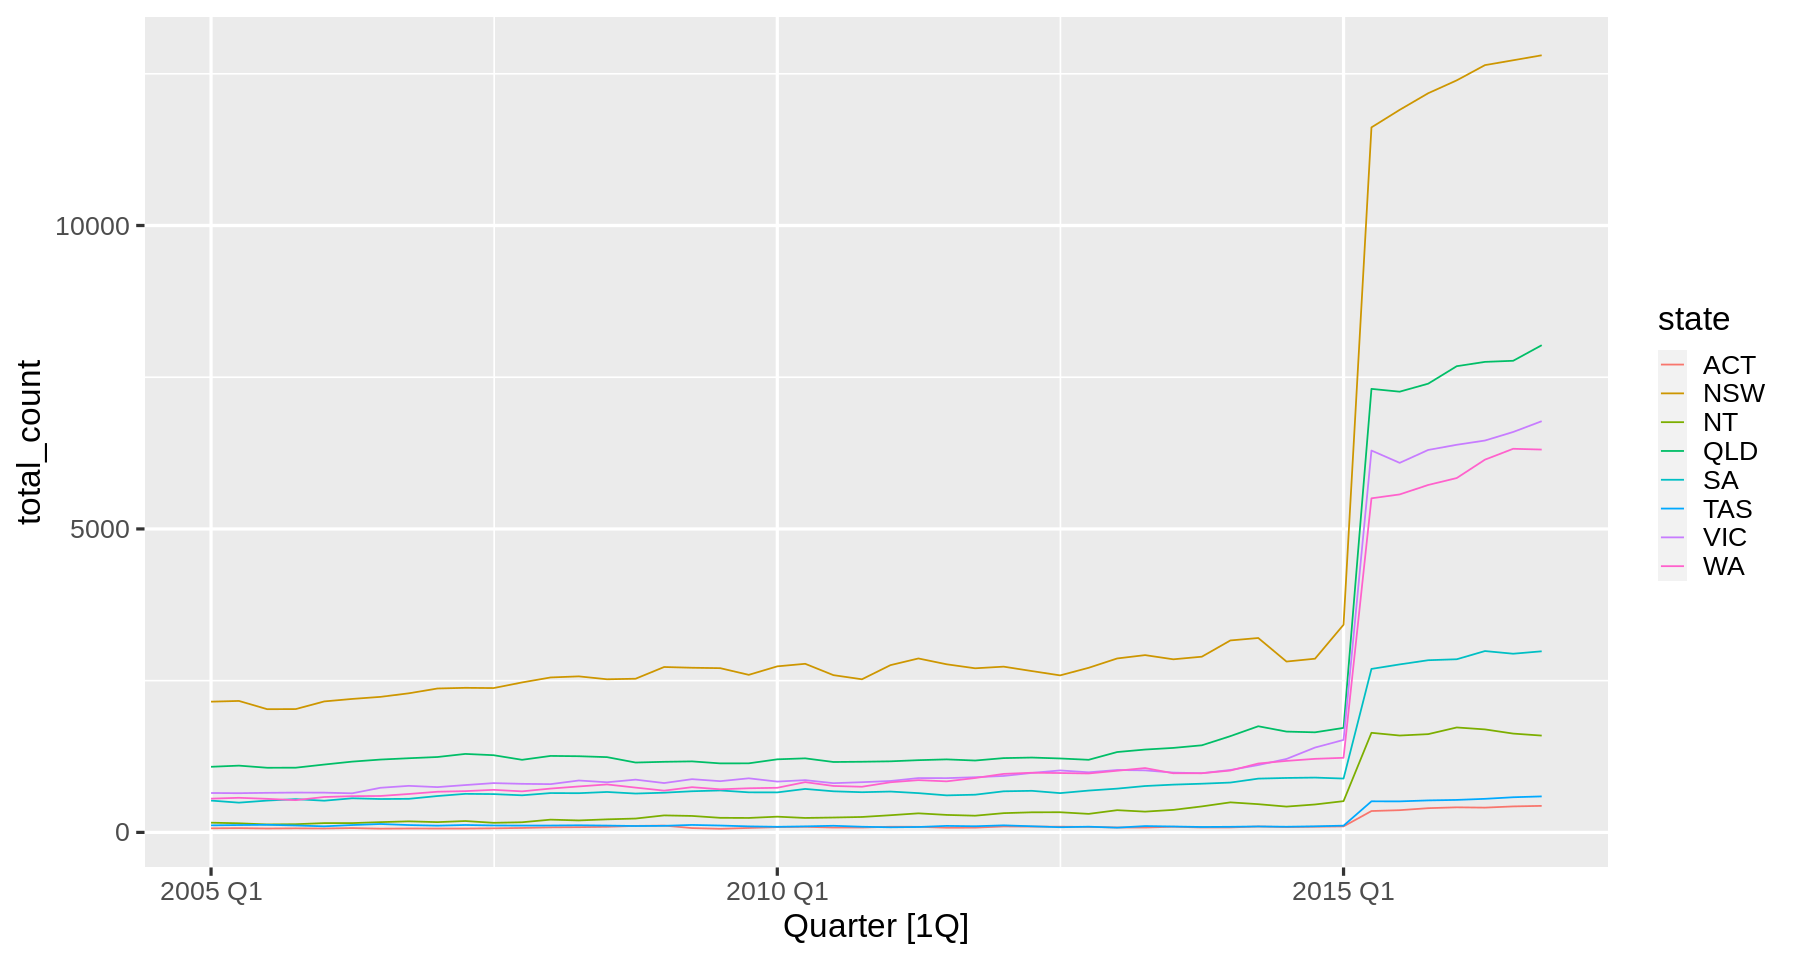

In [3]:
# read csv from github
prison <- readr::read_csv("https://raw.githubusercontent.com/nepslor/teaching/main/2023TimeSeriesForecasting/data/prison_population.csv")

# original tibble
head(prison)

# transform it in a tbl_ts object
prison_tsibble <- prison %>%
  mutate(Quarter = yearquarter(date)) %>%                 # create Quarter index
  select(-date) %>%                                       # remove date column
  as_tsibble(                                             # convert to tsibble
    index = Quarter,
    key = c(state, gender, legal, indigenous) 
 )

# tsibble
head(prison_tsibble)

# plot prisoners aggregated by state
set_plot_dimensions(15, 8)
prison_tsibble %>% 
  group_by(state) %>%
  summarise(total_count = sum(count))%>%
  autoplot()

### Tsibble manipultation
As tsibbles heredits from tibbles, we can use `dplyr` functions such as `mutate`, `filter`, `select` and `summarise` to work with tsibble objects. Let's see some examples on the PBS dataset containing sales data on pharmaceutical products in Australia, containing the costs for a given class of medications.

Month    Concession   Type        ATC1 ATC1_desc                       ATC2
1 1991 Jul Concessional Co-payments A    Alimentary tract and metabolism A01 
2 1991 Aug Concessional Co-payments A    Alimentary tract and metabolism A01 
3 1991 Sep Concessional Co-payments A    Alimentary tract and metabolism A01 
4 1991 Oct Concessional Co-payments A    Alimentary tract and metabolism A01 
5 1991 Nov Concessional Co-payments A    Alimentary tract and metabolism A01 
6 1991 Dec Concessional Co-payments A    Alimentary tract and metabolism A01 
  ATC2_desc                   Scripts Cost 
1 STOMATOLOGICAL PREPARATIONS 18228   67877
2 STOMATOLOGICAL PREPARATIONS 15327   57011
3 STOMATOLOGICAL PREPARATIONS 14775   55020
4 STOMATOLOGICAL PREPARATIONS 15380   57222
5 STOMATOLOGICAL PREPARATIONS 14371   52120
6 STOMATOLOGICAL PREPARATIONS 15028   54299

Month    total_cost
1 1991 Jul 3.526591  
2 1991 Aug 3.180891  
3 1991 Sep 3.252221  
4 1991 Oct 3.611003  
5 1991 Nov 3.565869  
6 1991 Dec 4.306371

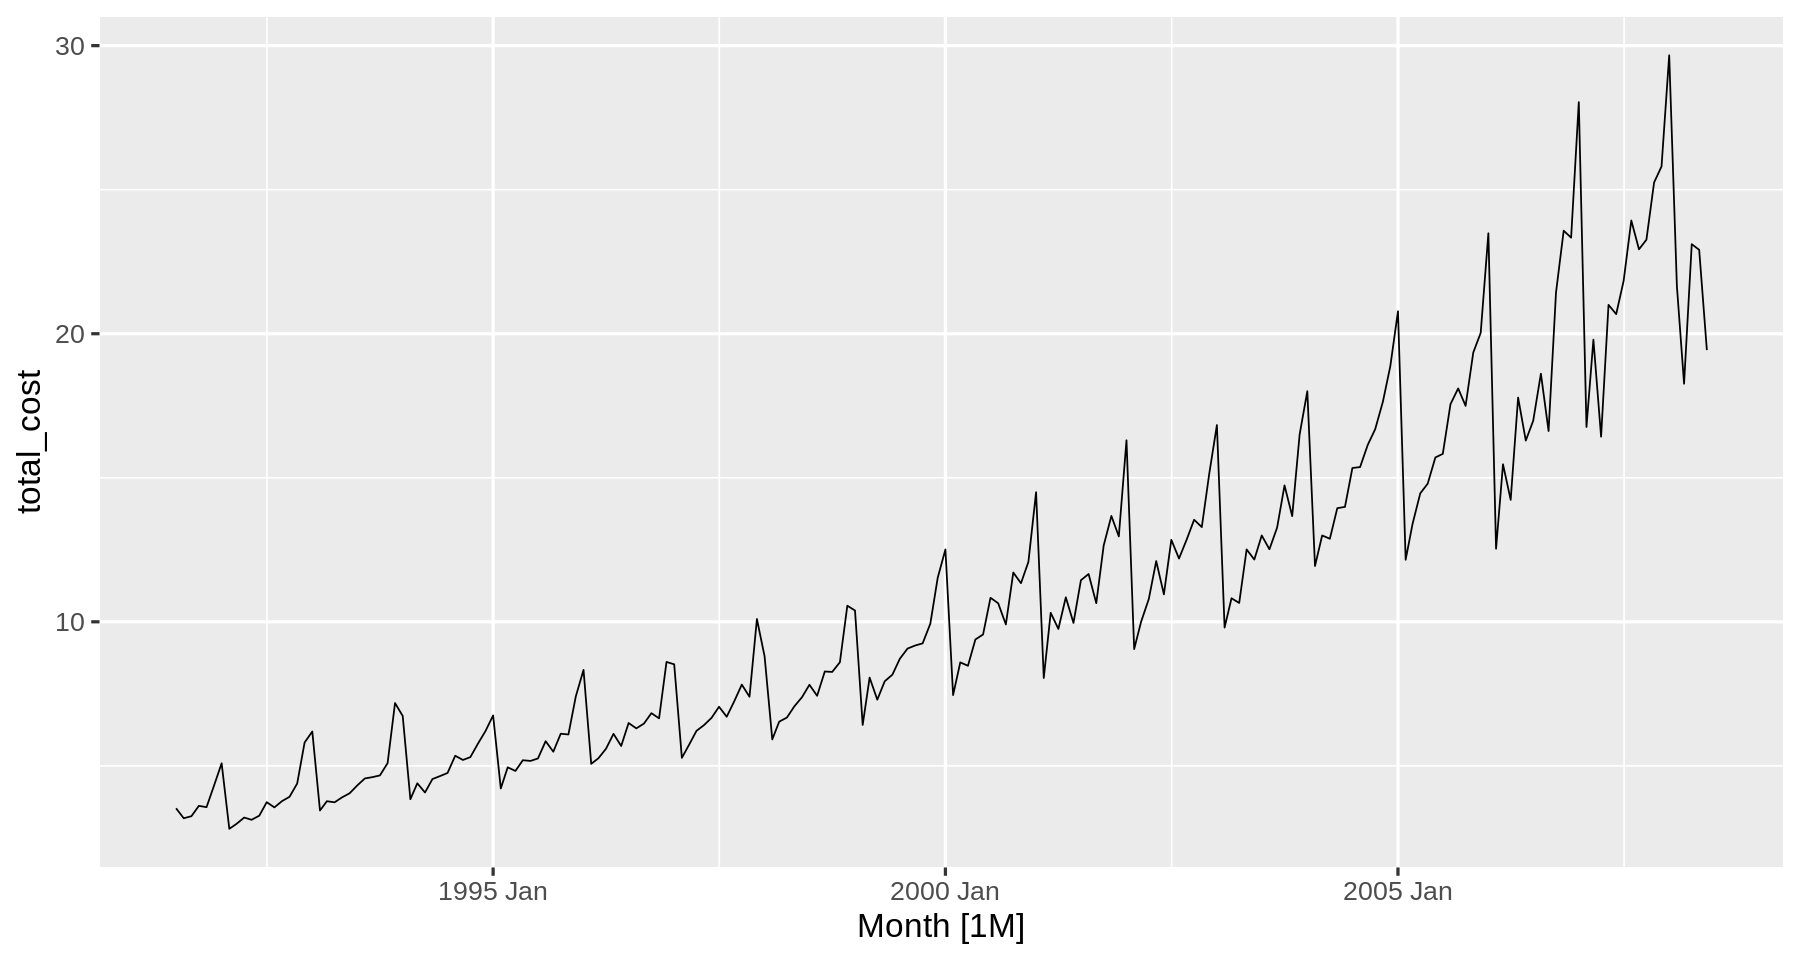

In [4]:
head(PBS)
PBS %>%
  filter(ATC2 == "A10") %>%                         # filter on Anatomical Therapeutic Chemical (ATC) indexes      
  select(Cost) %>%                                  # select the Cost column
  summarise(total_cost = sum(Cost)) %>%             # sum the Cost 
  mutate(total_cost = total_cost / 1e6) -> PBS_10   # mutate the total_cost column dividing it by 1e6

head(PBS_10)

PBS_10 %>%
  autoplot(total_cost)


###❓ Q1
Do you notice something strange with the `select` function?  Try to use it on the prison tsibble and tibble. How does the function behave?

In [5]:
prison_tsibble %>% 
  select(count)%>%
  head()

prison %>% 
  select(count)%>%
  head()

count Quarter state gender legal    indigenous
1 0     2005 Q1 ACT   Female Remanded ATSI      
2 1     2005 Q2 ACT   Female Remanded ATSI      
3 0     2005 Q3 ACT   Female Remanded ATSI      
4 0     2005 Q4 ACT   Female Remanded ATSI      
5 1     2006 Q1 ACT   Female Remanded ATSI      
6 1     2006 Q2 ACT   Female Remanded ATSI

count
1  0   
2  2   
3  0   
4  0   
5  7   
6 58

###❓ Q2 
Using the Passengers dataset, containing the total number of passengers divided by route and price class, try to plot: 
* the time series of the Economy routes
* the total number of passengers for the MEL-SYD route
* the total number of passengers divided by price class


Week     Airports Class    Passengers
1 1989 W28 ADL-PER  Business 193       
2 1989 W29 ADL-PER  Business 254       
3 1989 W30 ADL-PER  Business 185       
4 1989 W31 ADL-PER  Business 254       
5 1989 W32 ADL-PER  Business 191       
6 1989 W33 ADL-PER  Business 136

Plot variable not specified, automatically selected `.vars = passengers_by_class`


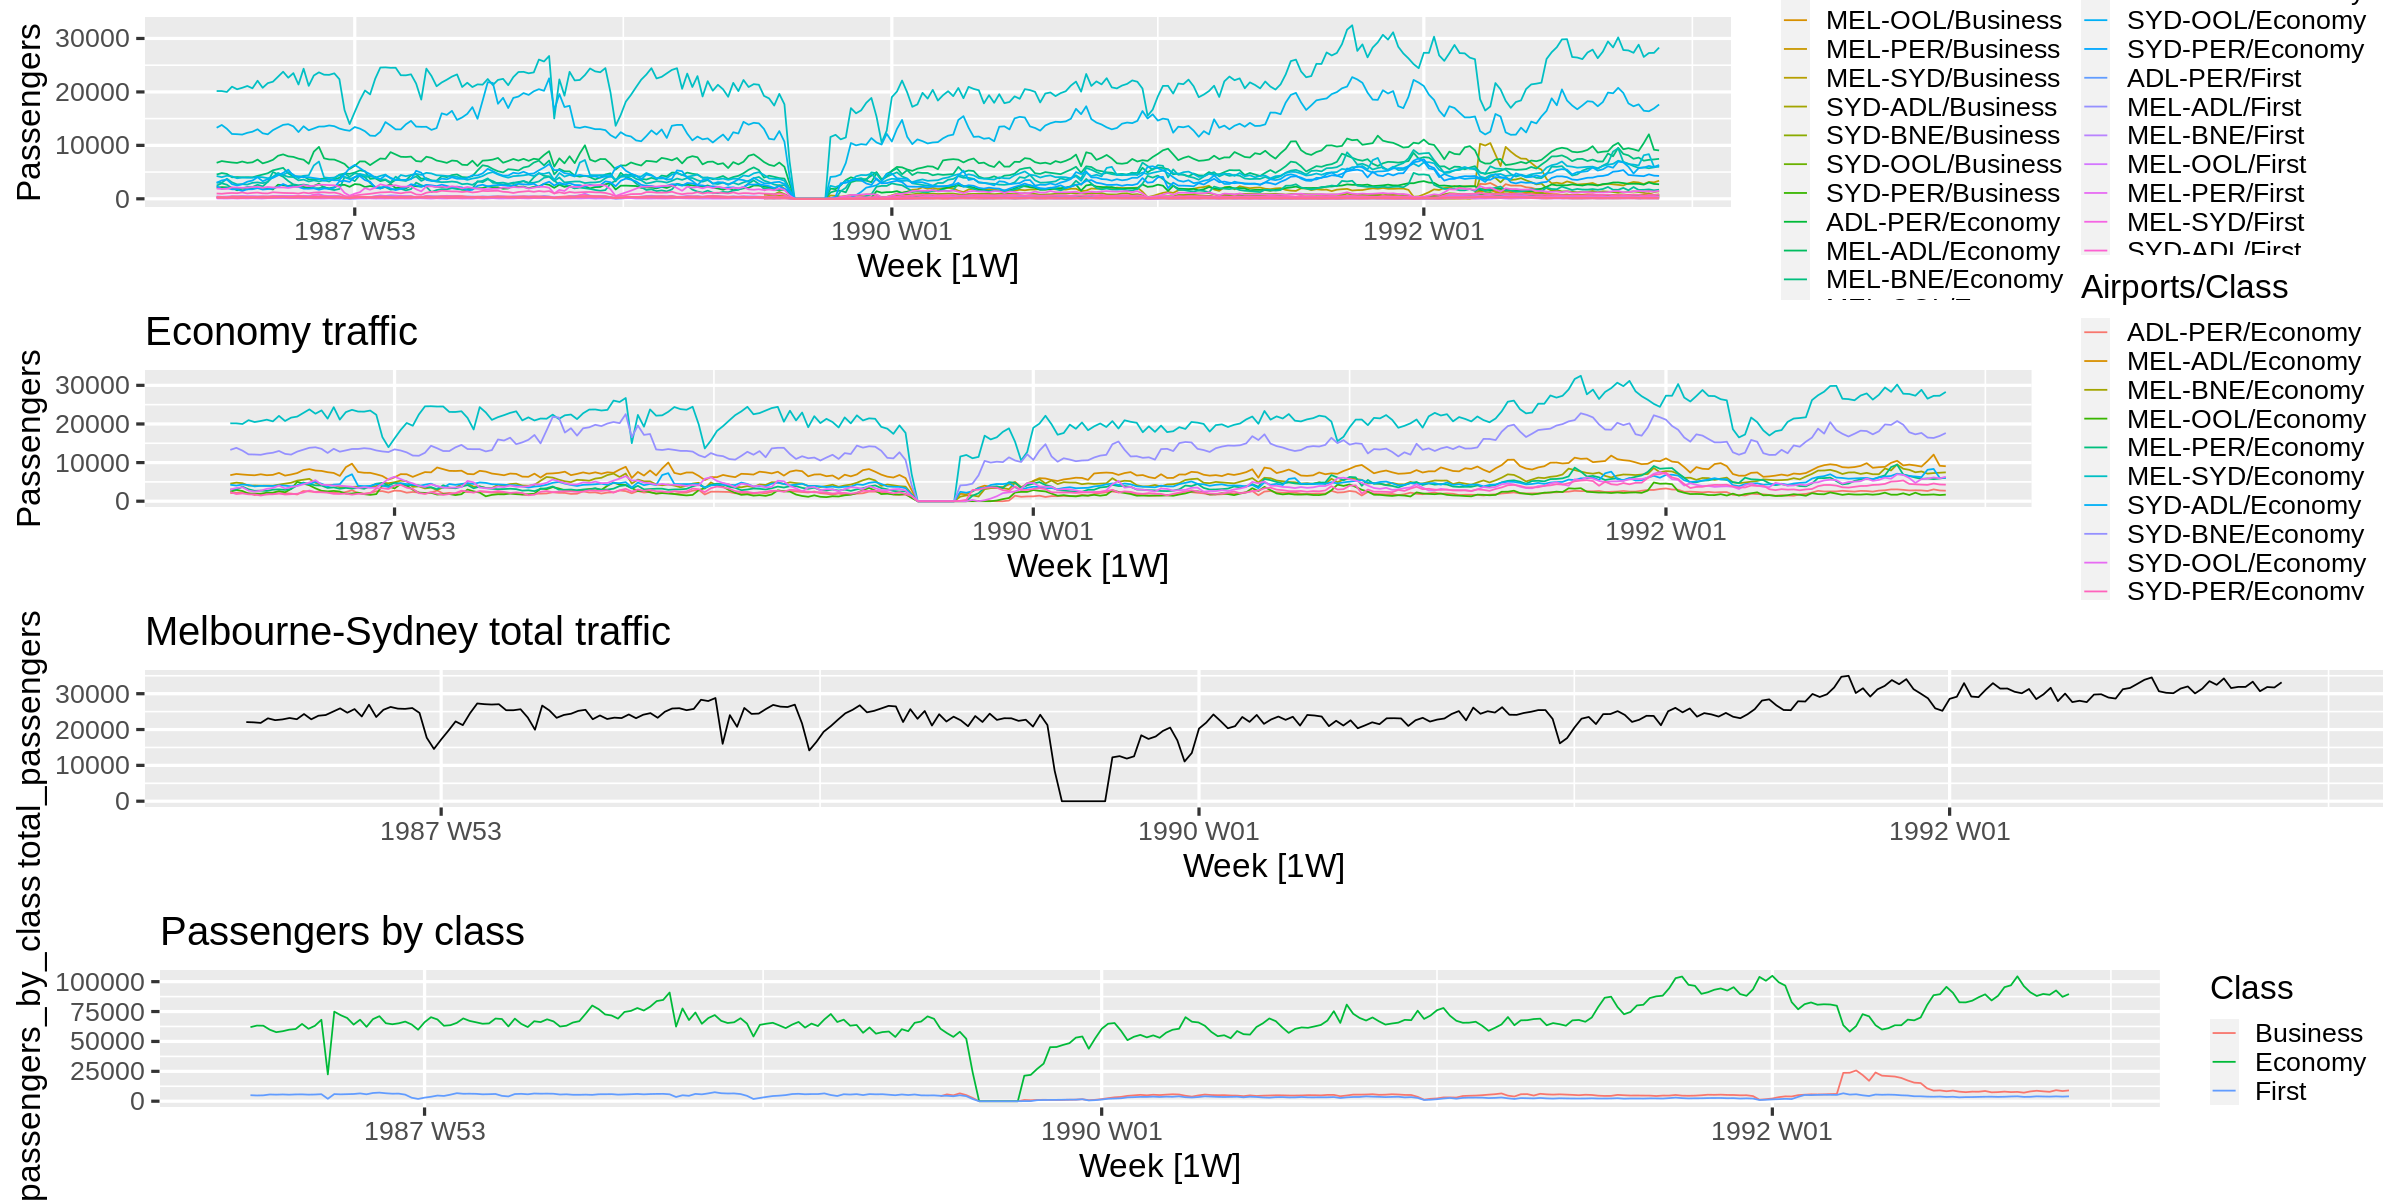

In [6]:
head(ansett)
pl1<-ansett %>%
  autoplot(Passengers)

pl2<-ansett %>%
  filter(Class == "Economy") %>%
  autoplot(Passengers)+
  labs(title = "Economy traffic")

pl3<-ansett %>%
  filter(Airports == "MEL-SYD") %>%
  summarise(total_passengers = sum(Passengers)) %>%
  autoplot(total_passengers)+
  labs(title = "Melbourne-Sydney total traffic")

pl4<-ansett %>%
  group_by(Class)%>%
  summarise(passengers_by_class=sum(Passengers))%>%
  autoplot()+
  labs(title = "Passengers by class")

set_plot_dimensions(20, 10)
grid.arrange(pl1, pl2, pl3, pl4, nrow=4)

# 📗 Time series patterns
Before choosing a forecasting method, a good ideas is to prelminary identify patterns in the time series. \\
Typical time-series patterns are:
* *Trend*: long-term increase or decrease in the data
* *Seasonal*: when a series is influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week).
* *Cyclic*: data exhibit rises and falls that are not
of fixed period (duration usually of at least 2 years).

`gg_season` and `gg_subseries` are two functions which can be useful to visualize seasonal variations with different periods. 


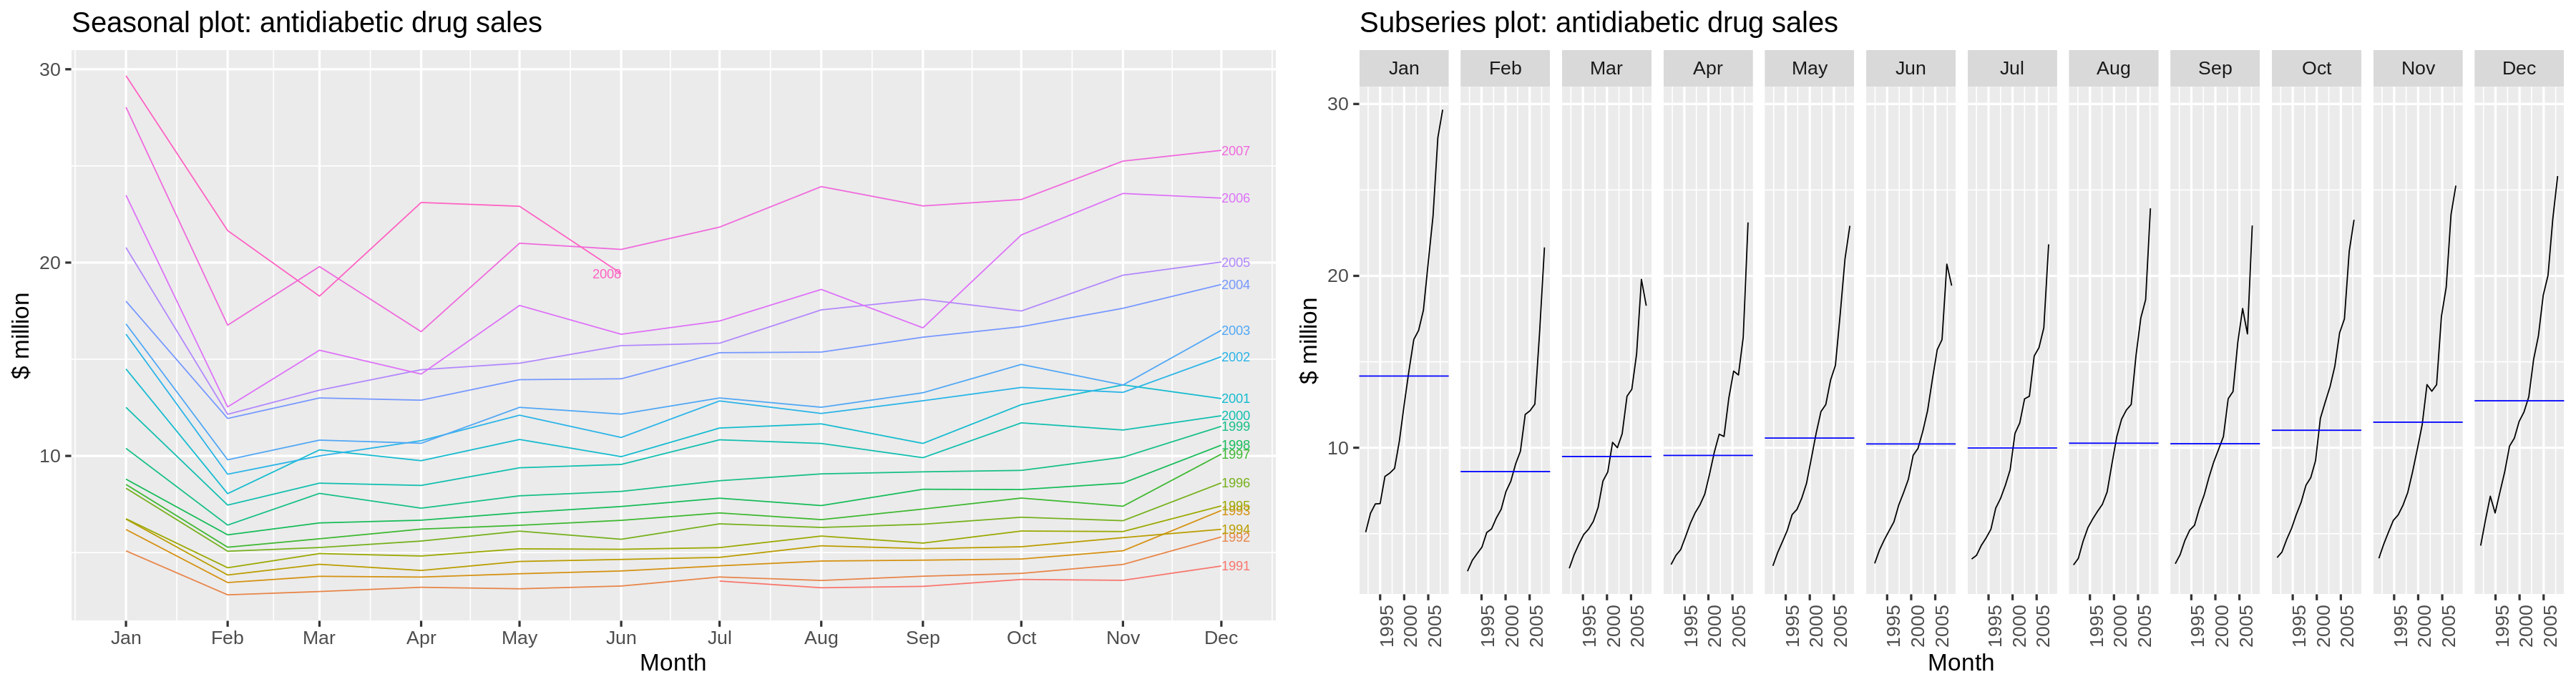

In [7]:
# plot month variations by year
pl1 <-PBS_10 %>% 
  gg_season(total_cost, labels = "right") +
  labs( y = "$ million", title = "Seasonal plot: antidiabetic drug sales")

# plot yearly variations by month
pl2 <- PBS_10 %>%
  gg_subseries(total_cost) +
  labs(y = "$ million", title = "Subseries plot: antidiabetic drug sales" )

set_plot_dimensions(30, 8)
grid.arrange(pl1, pl2, ncol=2)



`gg_season` can also be used with the additional argument `period`, if the passed tsibble has more than one periodicity, as in the case for the `vic_elec` dataset, containing half-hourly electricity demand for the state of Victoria, Australia.

Time                Demand   Temperature Date       Holiday
1 2012-01-01 00:00:00 4382.825 21.40       2012-01-01 TRUE   
2 2012-01-01 00:30:00 4263.366 21.05       2012-01-01 TRUE   
3 2012-01-01 01:00:00 4048.966 20.70       2012-01-01 TRUE   
4 2012-01-01 01:30:00 3877.563 20.55       2012-01-01 TRUE   
5 2012-01-01 02:00:00 4036.230 20.40       2012-01-01 TRUE   
6 2012-01-01 02:30:00 3865.597 20.25       2012-01-01 TRUE

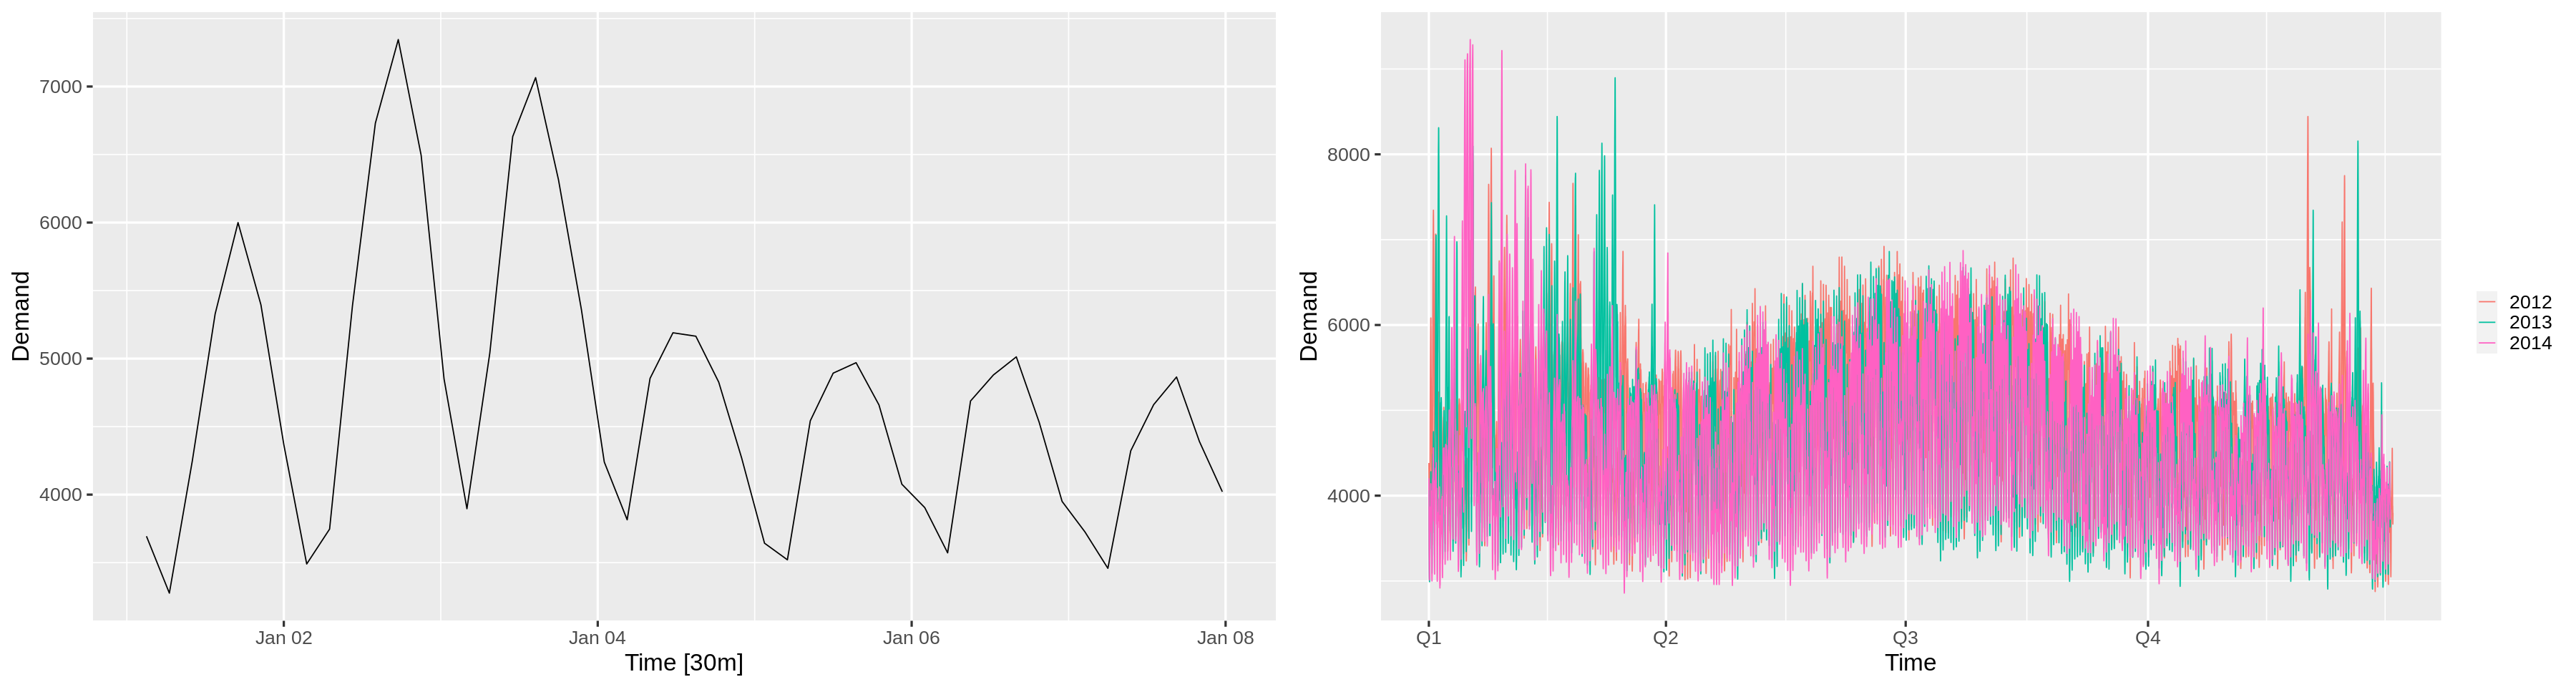

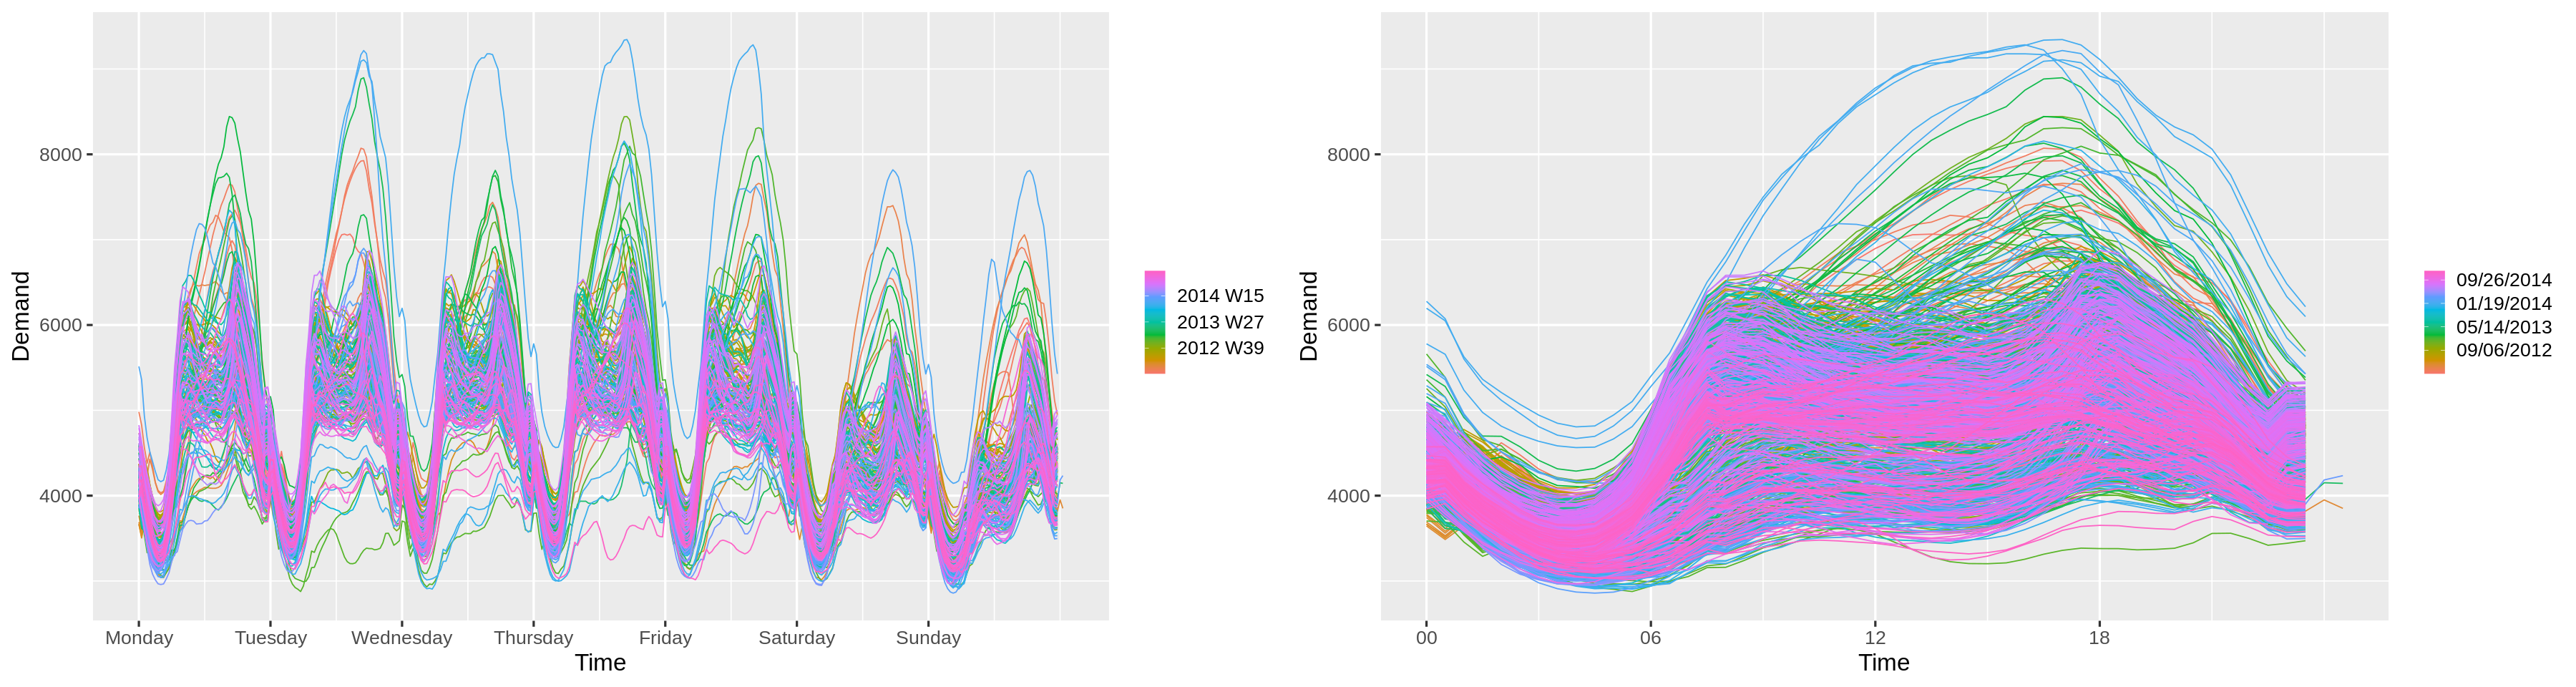

In [8]:
head(vic_elec)

pl1<-vic_elec %>% slice(0:48*7) %>% autoplot(Demand)
pl2<-vic_elec %>% gg_season(Demand)
pl3<-vic_elec %>% gg_season(Demand, period = "week")
pl4<-vic_elec %>% gg_season(Demand, period = "day")

grid.arrange(pl1, pl2, ncol=2)
grid.arrange(pl3, pl4, ncol=2)


## Advanced time filtering
Advanced filterin can be obatined using the logical operator & and the %>% oparator. Temporal statistics on time series can be obatined with the `index_by` command. Unless the time index is repeated, we cannot use the `group_by` command to achieve this.  

Plot variable not specified, automatically selected `.vars = Demand`
Plot variable not specified, automatically selected `.vars = max_temp`


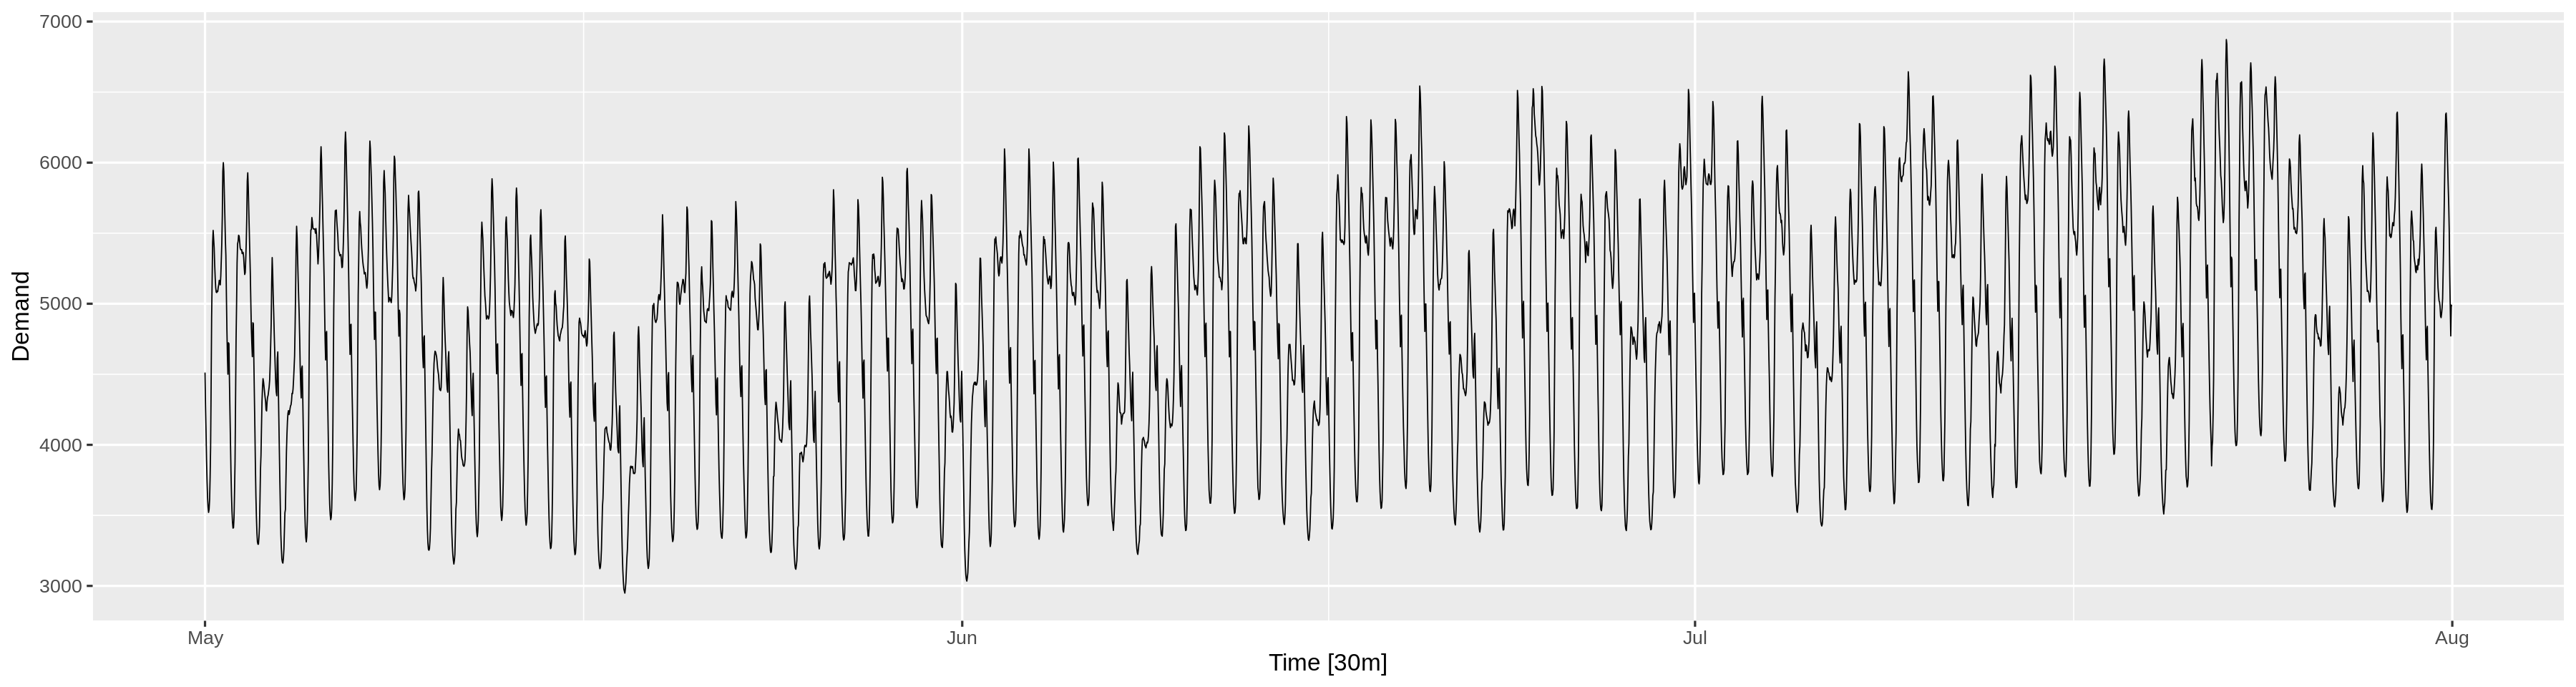

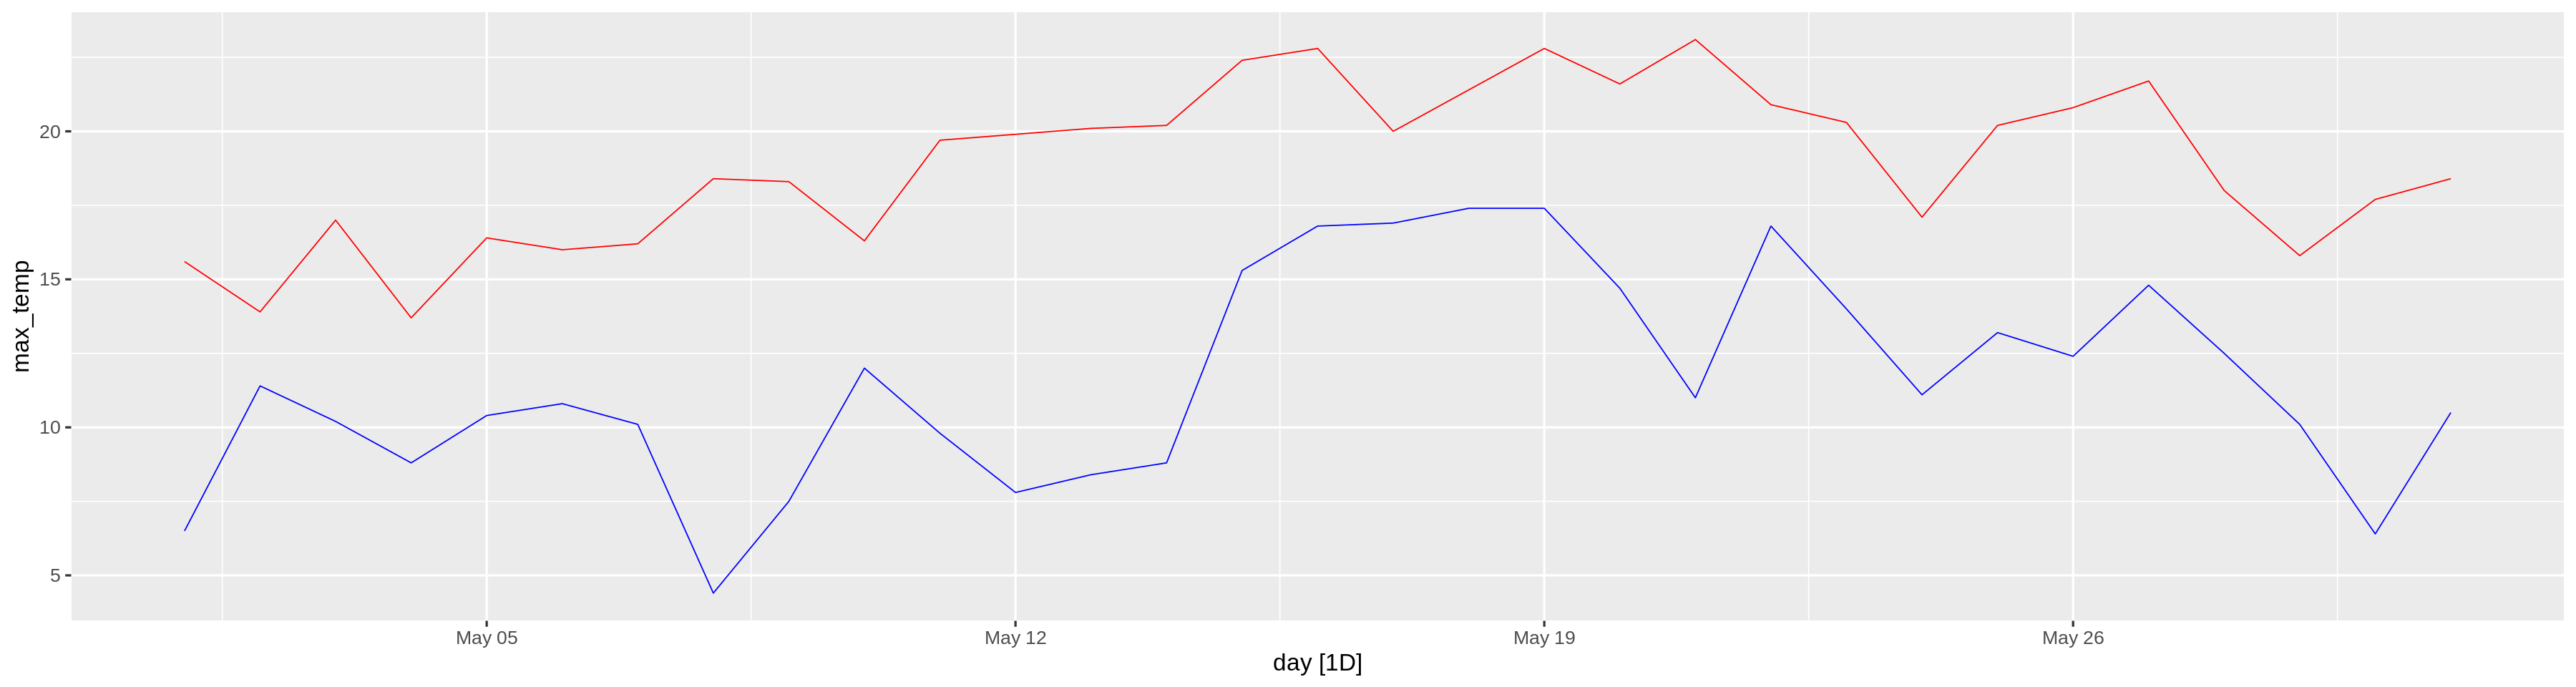

In [64]:
# retrieve the power between May-July 2014
vic_elec%>%
  filter(year(Time) == 2014 & month(Time) %in% c(5,6,7))%>%
  autoplot()

# obtain maximum and minimum temperatures in the selected period
max_T<-vic_elec%>%
  filter(year(Time) == 2014 & month(Time) == 5)%>%
  index_by(day=date(Time))%>%
  summarise(max_temp=max(Temperature))

min_T<-vic_elec%>%
  filter(year(Time) == 2014 & month(Time) == 5)%>%
  index_by(day=date(Time))%>%
  summarise(min_temp=min(Temperature))

# plot the maximum and minimum daily temperatures
max_T%>%autoplot(color='red') +
   geom_line(data=min_T, aes(x=day, y=min_temp), color='blue')


## Scatter plots
The graphs discussed so far are useful for visualising individual time series. It is also useful to explore relationships between time series; this includes relatoins between the time series at current time and its lag, $x_t$ and $x_{t-k}$

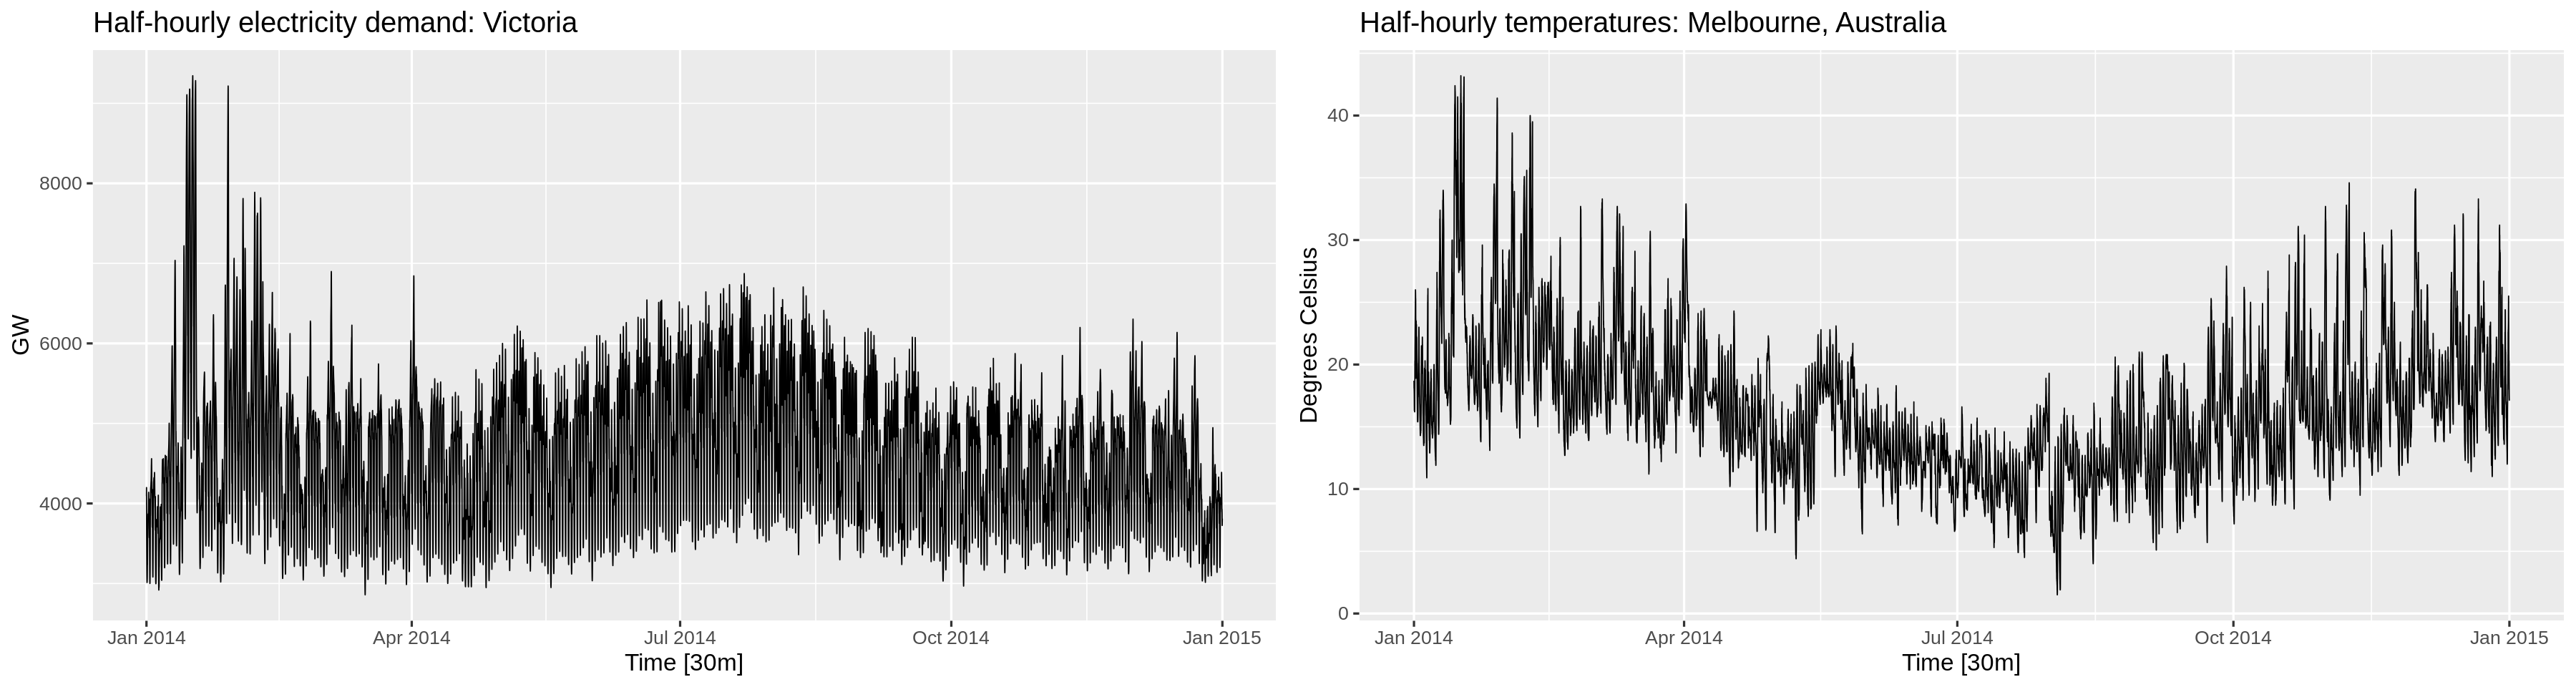

In [21]:
vic_elec %>%
  filter(year(Time) == 2014) %>%
  autoplot(Demand) +
  labs(y = "GW",
       title = "Half-hourly electricity demand: Victoria")->pl1

vic_elec %>%
filter(year(Time) == 2014) %>%
autoplot(Temperature) +
labs(
  y = "Degrees Celsius",
  title = "Half-hourly temperatures: Melbourne, Australia"
)->pl2
grid.arrange(pl1, pl2, ncol=2)

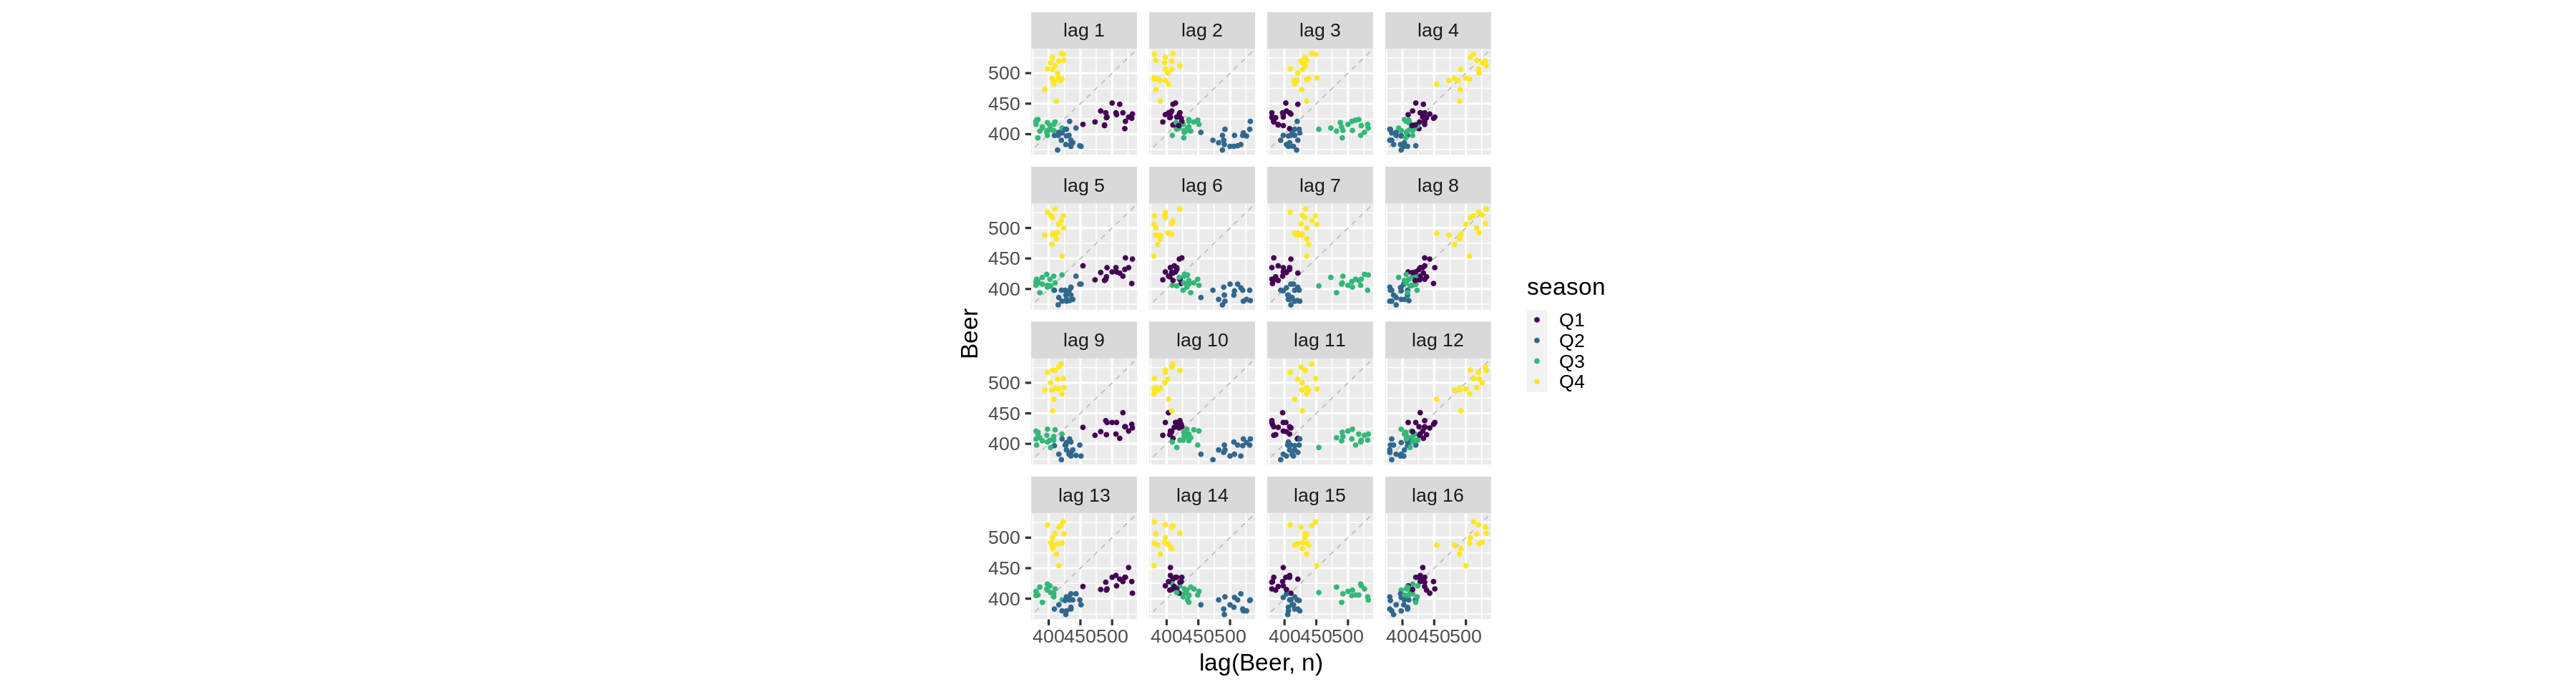

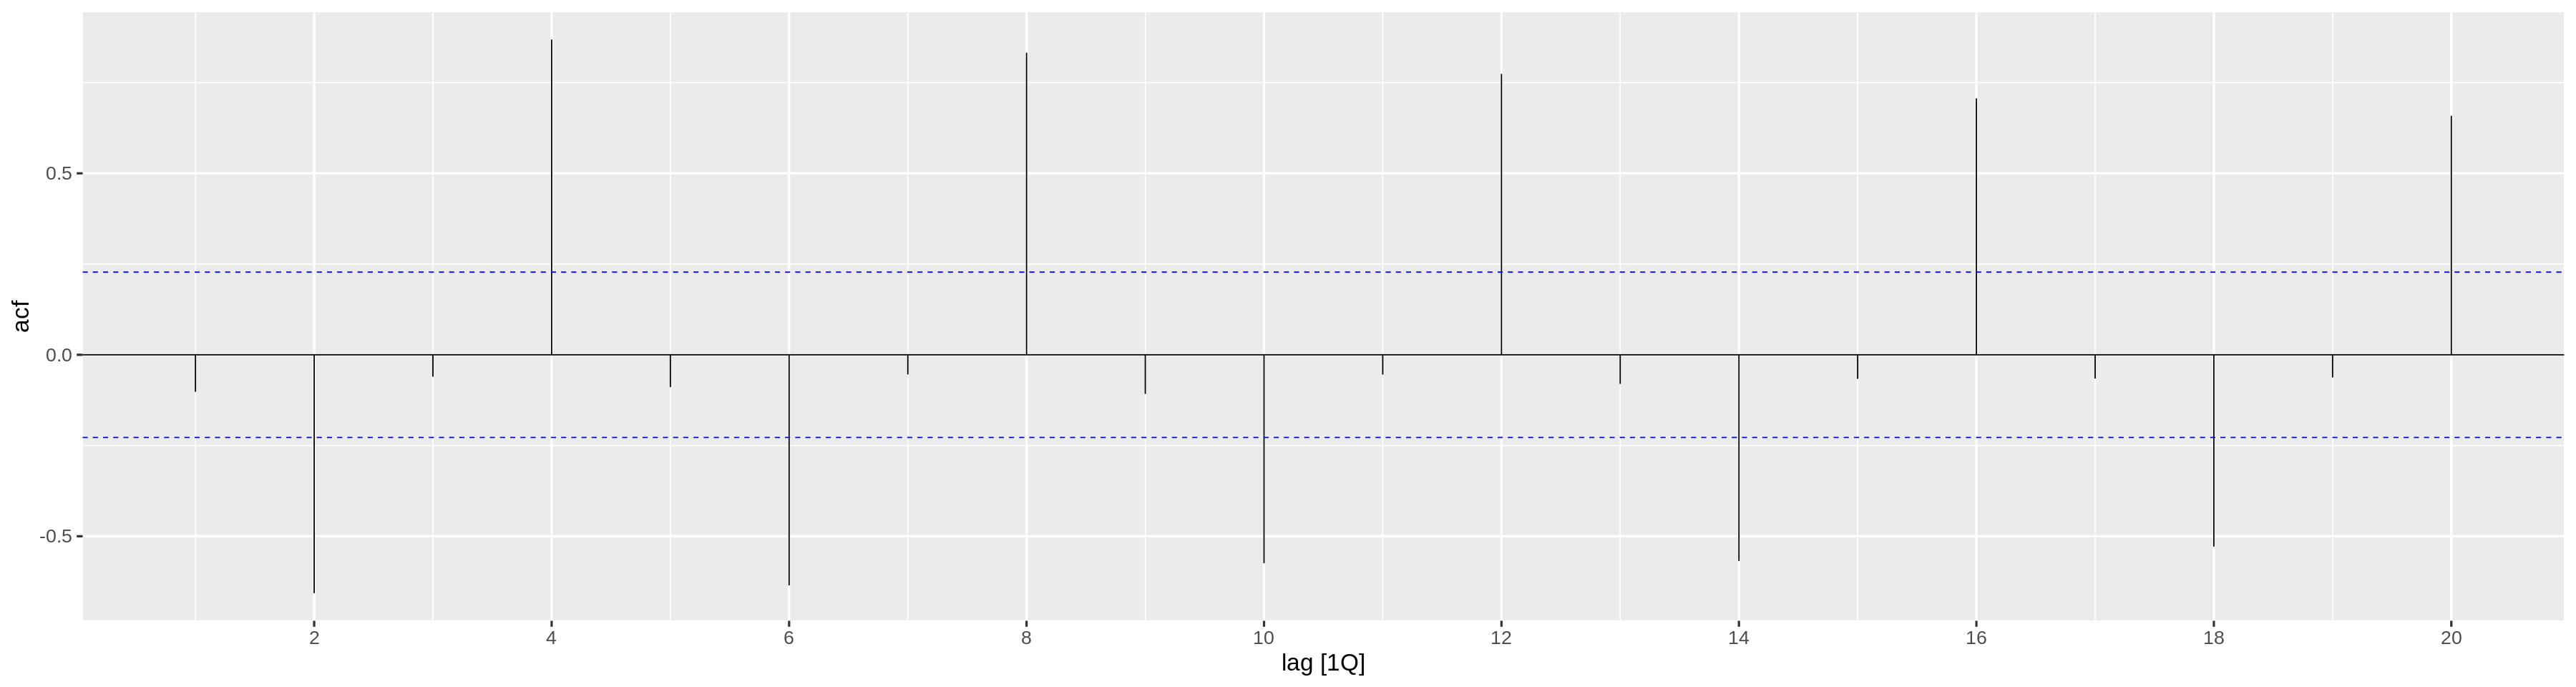

In [17]:

beer %>% gg_lag(Beer, geom = "point", lags = 1:16)

beer %>%
  ACF(Beer, lag_max = 20) %>%
  autoplot()


State Quarter Trips    
1   ACT   1998 Q1 196.2186 
2   ACT   1998 Q2 126.7706 
3   ACT   1998 Q3 110.6796 
4   ACT   1998 Q4 170.4722 
5   ACT   1999 Q1 107.7792 
6   ACT   1999 Q2 124.6442 
7   ACT   1999 Q3 177.9469 
8   ACT   1999 Q4 217.6562 
9   ACT   2000 Q1 158.4146 
10  ACT   2000 Q2 154.8065 
11  ACT   2000 Q3 110.7790 
12  ACT   2000 Q4 157.8623 
13  ACT   2001 Q1 143.6435 
14  ACT   2001 Q2 249.9085 
15  ACT   2001 Q3 132.4824 
16  ACT   2001 Q4 183.9750 
17  ACT   2002 Q1 164.1536 
18  ACT   2002 Q2 185.1443 
19  ACT   2002 Q3 113.2756 
20  ACT   2002 Q4 140.1915 
21  ACT   2003 Q1 111.4752 
22  ACT   2003 Q2 156.3438 
23  ACT   2003 Q3 140.4969 
24  ACT   2003 Q4 144.4553 
25  ACT   2004 Q1 114.0701 
26  ACT   2004 Q2 136.9661 
27  ACT   2004 Q3 129.6152 
28  ACT   2004 Q4 113.0256 
29  ACT   2005 Q1 121.8511 
30  ACT   2005 Q2 134.5084 
⋮   ⋮     ⋮       ⋮        
611 WA    2010 Q3  602.5672
612 WA    2010 Q4  567.0174
613 WA    2011 Q1  732.6574
614 WA    2011 Q2  647.6459
615 WA    2011 Q3  612.5326
616 WA    2011 Q4  665.9596
617 WA    2012 Q1  778.8399
618 WA    2012 Q2  679.9151
619 WA    2012 Q3  628.5220
620 WA    2012 Q4  691.6633
621 WA    2013 Q1  917.7258
622 WA    2013 Q2  745.1224
623 WA    2013 Q3  679.8861
624 WA    2013 Q4  690.6982
625 WA    2014 Q1 1265.7146
626 WA    2014 Q2 1065.8001
627 WA    2014 Q3  854.9872
628 WA    2014 Q4  897.8960
629 WA    2015 Q1 1167.7514
630 WA    2015 Q2  990.3225
631 WA    2015 Q3  928.0221
632 WA    2015 Q4  960.3365
633 WA    2016 Q1 1165.7180
634 WA    2016 Q2 1053.7725
635 WA    2016 Q3  803.5157
636 WA    2016 Q4  982.7526
637 WA    2017 Q1 1134.3520
638 WA    2017 Q2  997.8522
639 WA    2017 Q3  879.9885
640 WA    2017 Q4 1026.2860

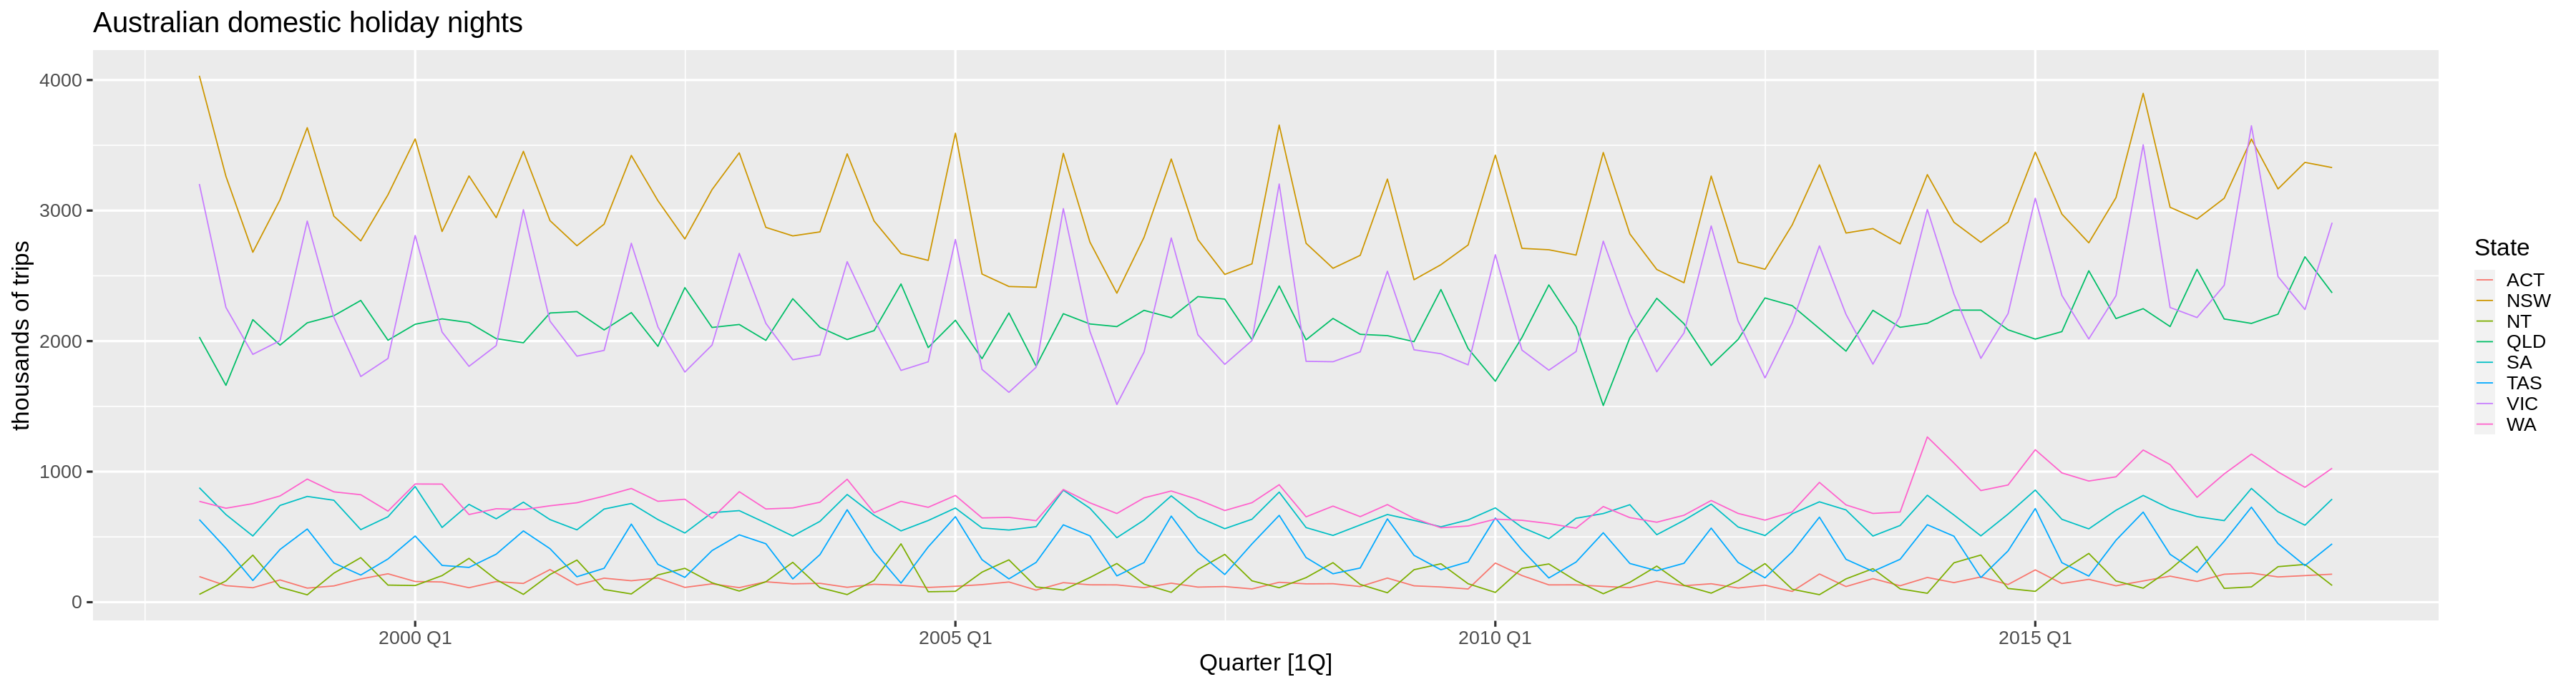

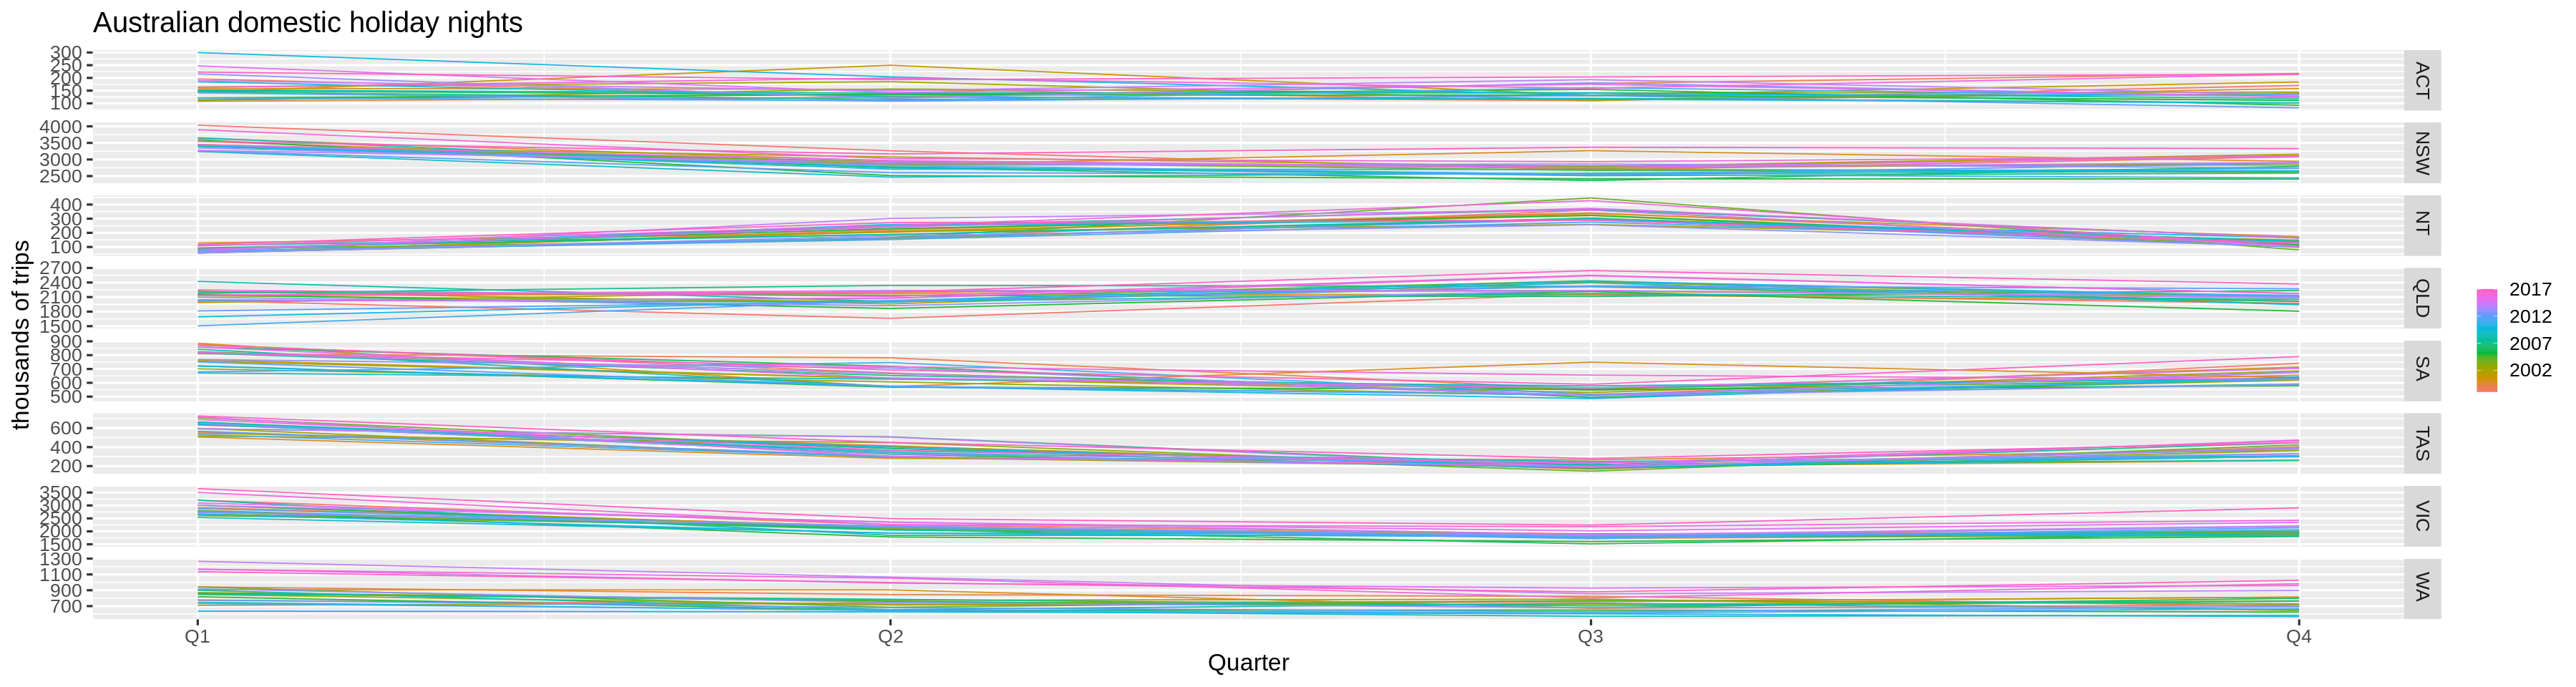

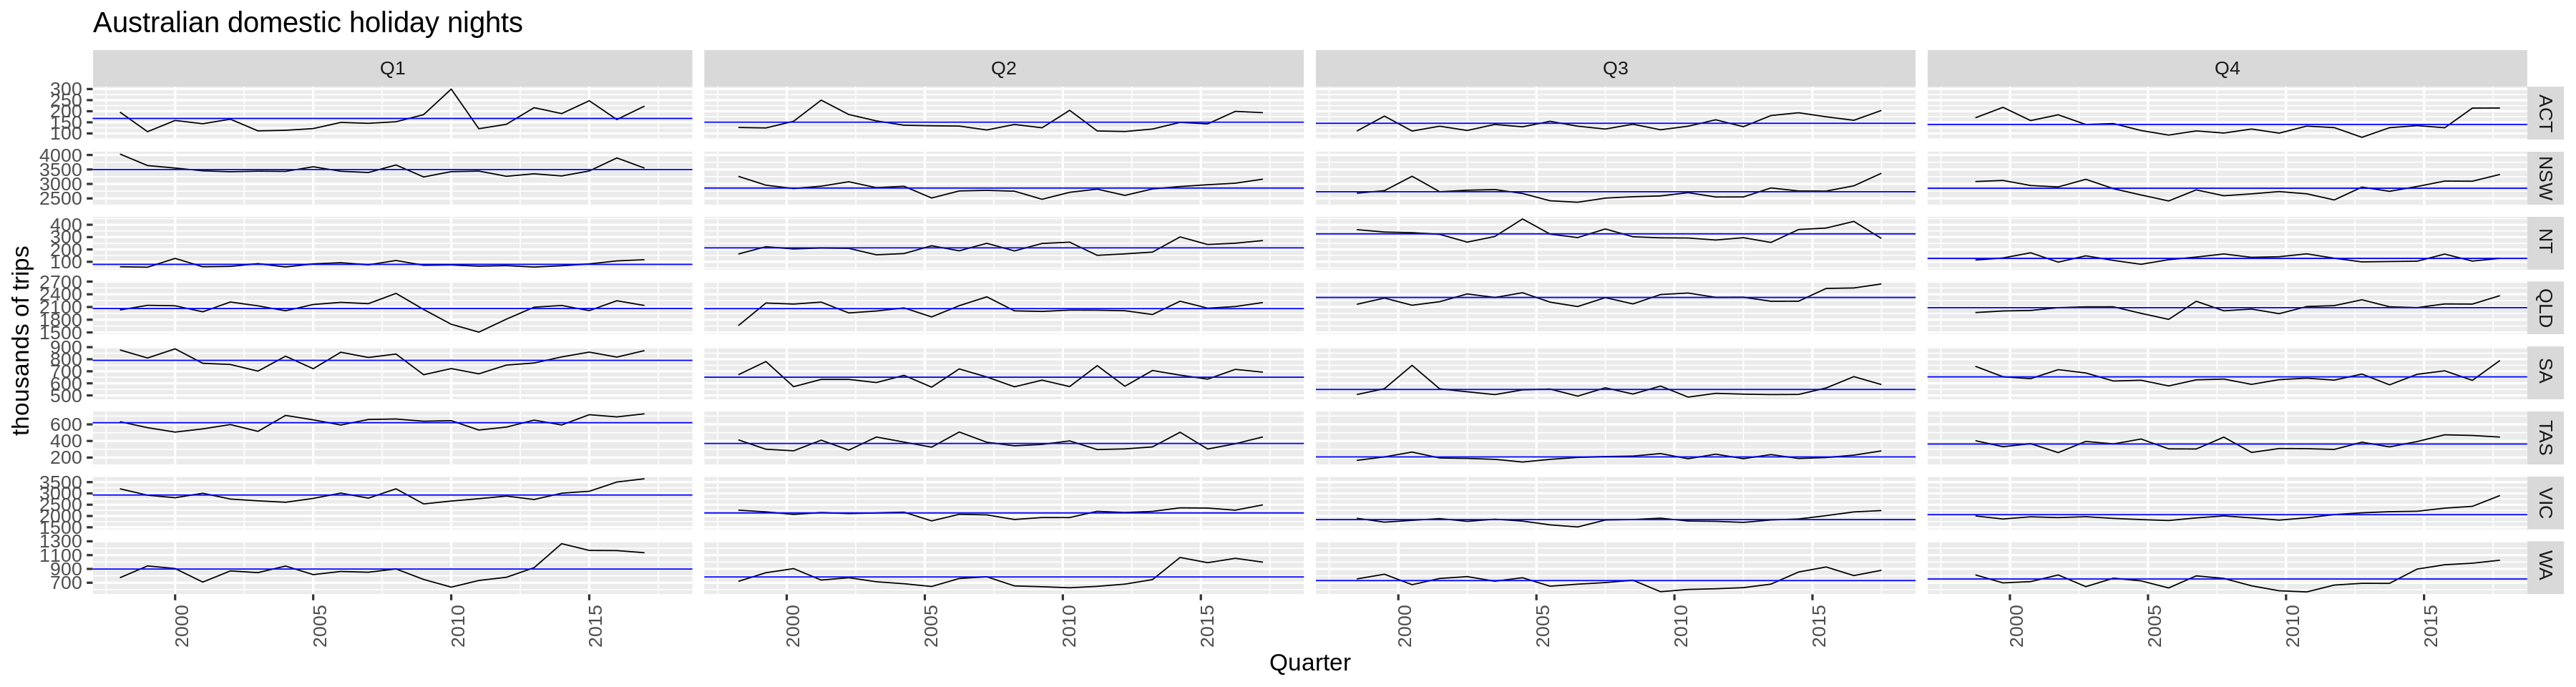

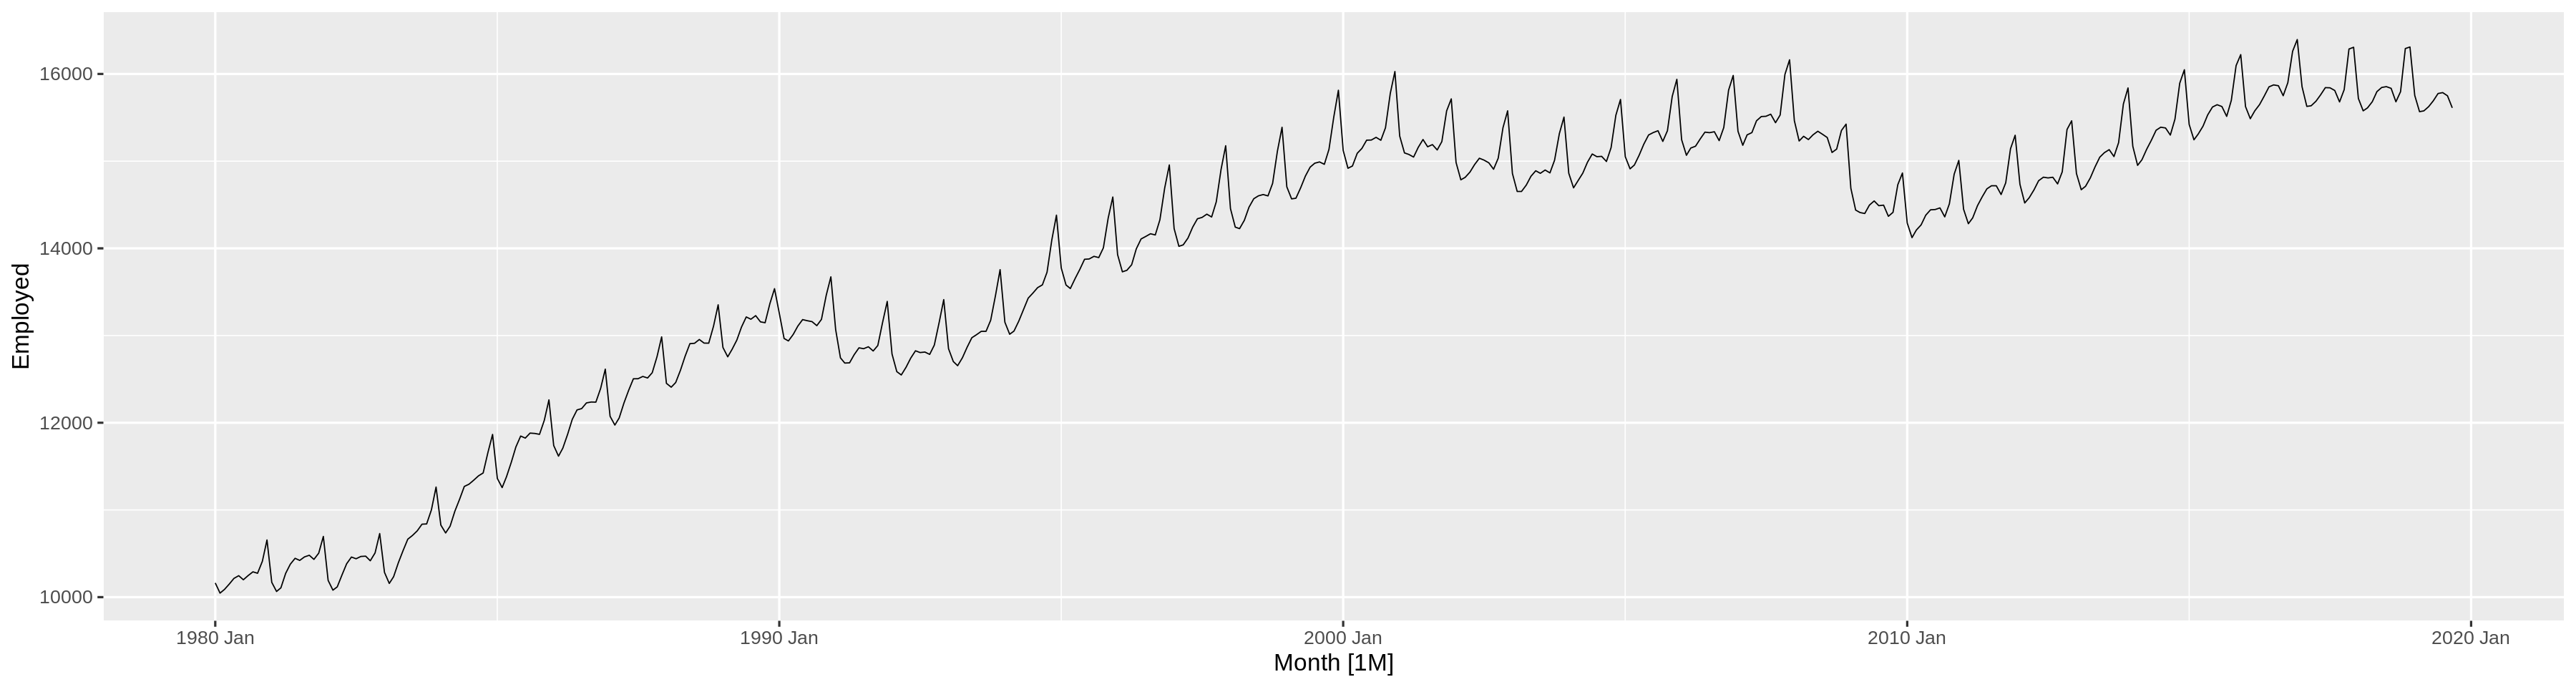

Date       Close   
1   2015-01-02 521.9377
2   2015-01-05 511.0576
3   2015-01-06 499.2128
4   2015-01-07 498.3575
5   2015-01-08 499.9289
6   2015-01-09 493.4545
7   2015-01-12 489.8543
8   2015-01-13 493.4644
9   2015-01-14 498.1288
10  2015-01-15 499.0437
11  2015-01-16 505.2993
12  2015-01-20 504.1258
13  2015-01-21 515.2048
14  2015-01-22 531.4653
15  2015-01-23 536.9949
16  2015-01-26 532.2808
17  2015-01-27 515.7916
18  2015-01-28 507.2088
19  2015-01-29 507.8652
20  2015-01-30 531.5946
21  2015-02-02 525.5876
22  2015-02-03 526.3435
23  2015-02-04 519.8990
24  2015-02-05 524.6926
25  2015-02-06 528.0939
26  2015-02-09 524.9412
27  2015-02-10 534.0013
28  2015-02-11 533.0367
29  2015-02-12 539.9586
30  2015-02-13 546.0053
⋮   ⋮          ⋮       
223 2015-11-18 740.00  
224 2015-11-19 738.41  
225 2015-11-20 756.60  
226 2015-11-23 755.98  
227 2015-11-24 748.28  
228 2015-11-25 748.15  
229 2015-11-27 750.26  
230 2015-11-30 742.60  
231 2015-12-01 767.04  
232 2015-12-02 762.38  
233 2015-12-03 752.54  
234 2015-12-04 766.81  
235 2015-12-07 763.25  
236 2015-12-08 762.37  
237 2015-12-09 751.61  
238 2015-12-10 749.46  
239 2015-12-11 738.87  
240 2015-12-14 747.77  
241 2015-12-15 743.40  
242 2015-12-16 758.09  
243 2015-12-17 749.43  
244 2015-12-18 739.31  
245 2015-12-21 747.77  
246 2015-12-22 750.00  
247 2015-12-23 750.31  
248 2015-12-24 748.40  
249 2015-12-28 762.51  
250 2015-12-29 776.60  
251 2015-12-30 771.00  
252 2015-12-31 758.88

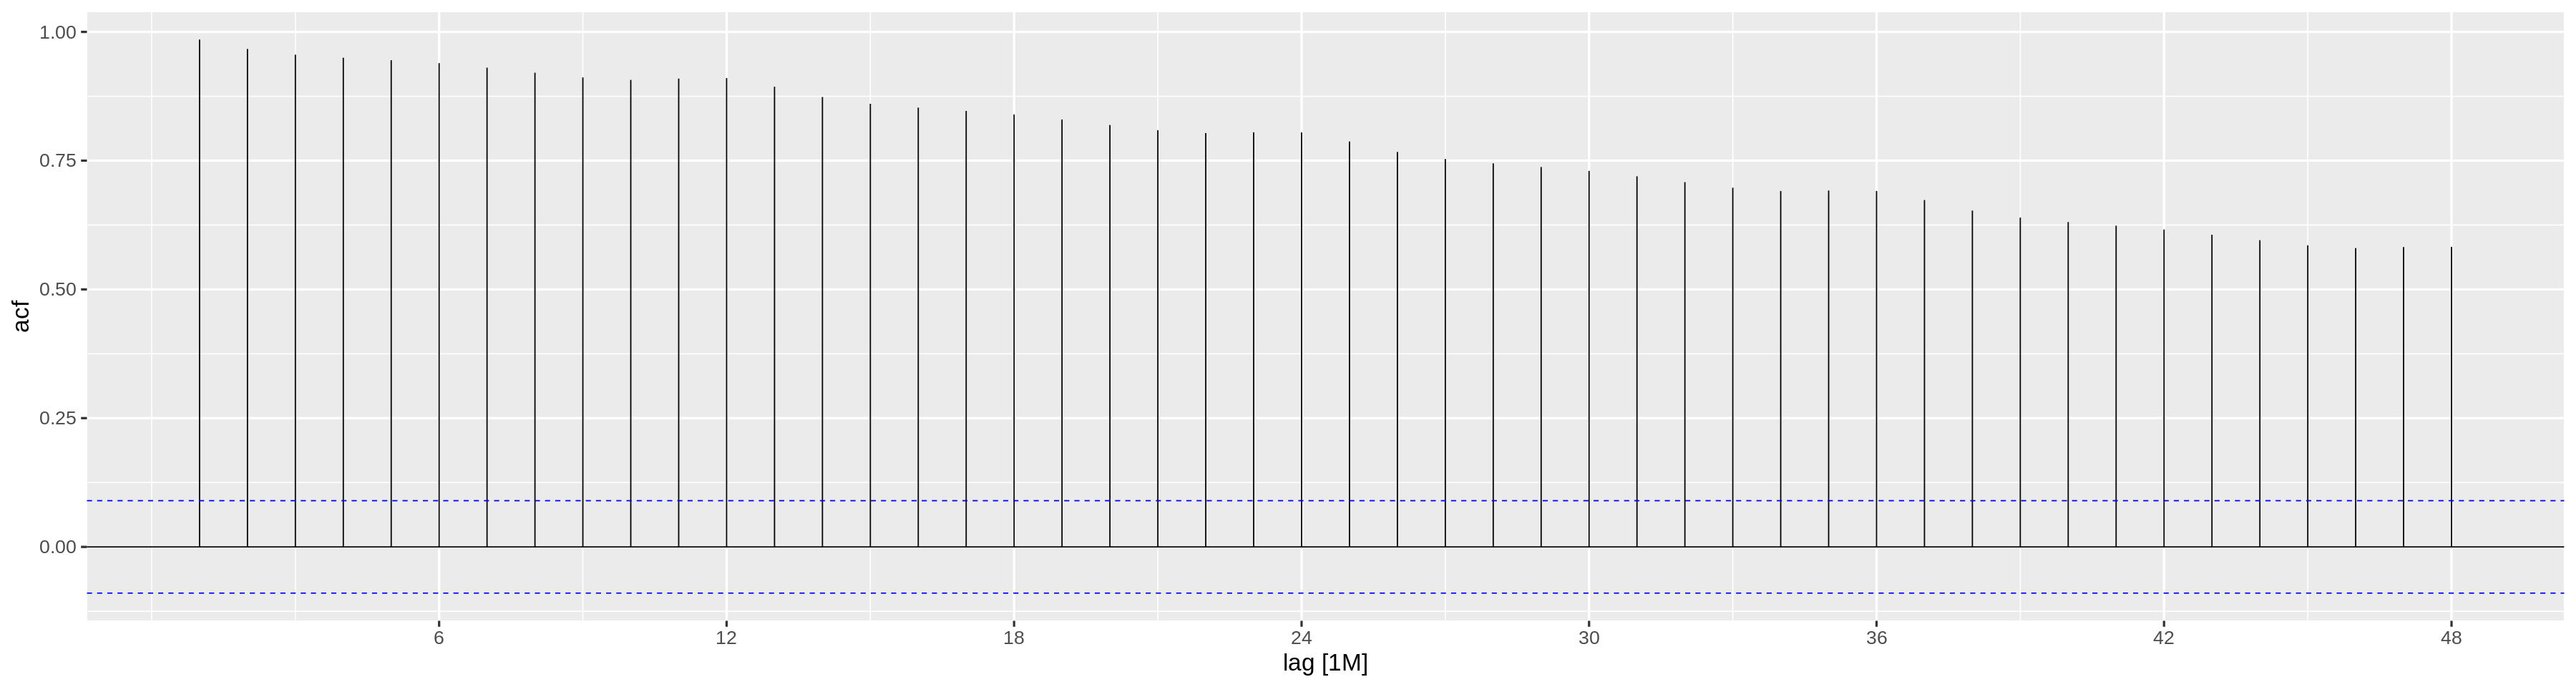

Warning message:
“Provided data has an irregular interval, results should be treated with caution. Computing ACF by observation.”


lag acf      
1  1   0.9815199
2  2   0.9594553
3  3   0.9374954
4  4   0.9180363
5  5   0.9006212
6  6   0.8833129
7  7   0.8653349
8  8   0.8487922
9  9   0.8336546
10 10  0.8181736
11 11  0.8021619
12 12  0.7872364
13 13  0.7734625
14 14  0.7613580
15 15  0.7482463
16 16  0.7347525
17 17  0.7188027
18 18  0.6996966
19 19  0.6795768
20 20  0.6622775
21 21  0.6423062
22 22  0.6217039
23 23  0.6031308
24 24  0.5847691

Warning message:
“Provided data has an irregular interval, results should be treated with caution. Computing ACF by observation.”


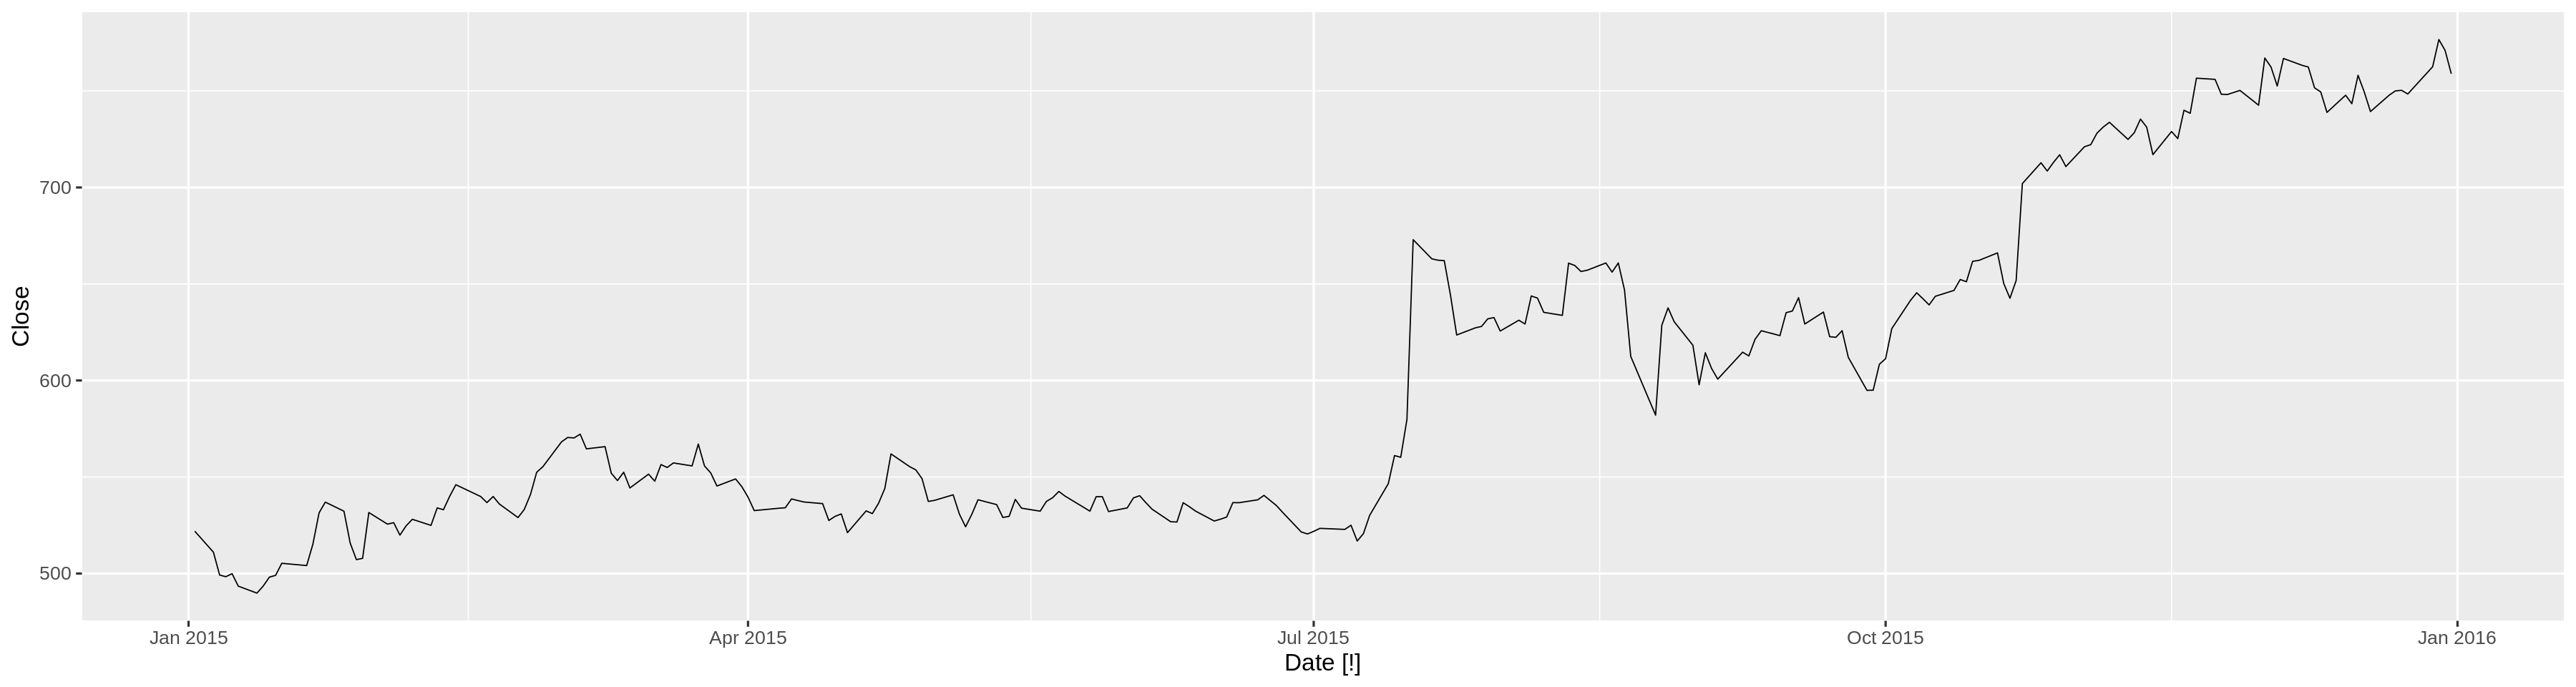

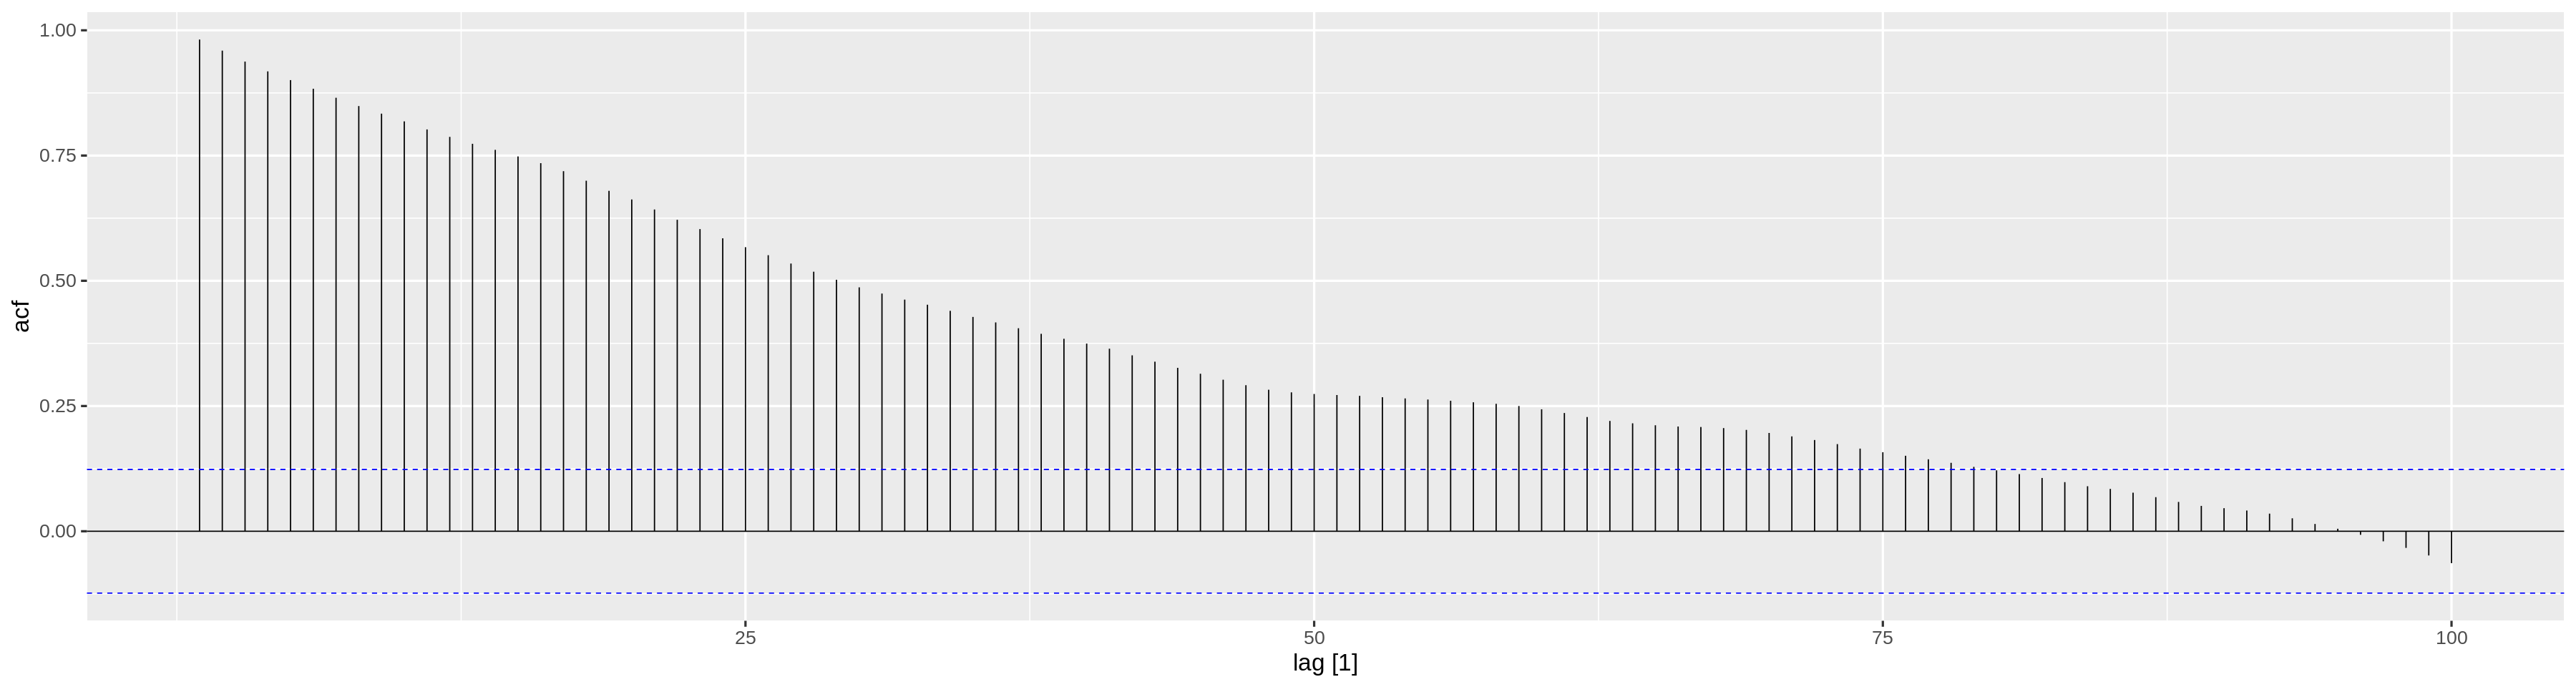

lag acf        
1  1    0.01384349
2  2   -0.16331060
3  3    0.16311091
4  4   -0.25873283
5  5   -0.19770051
6  6    0.06422128
7  7   -0.13867546
8  8   -0.03160175
9  9    0.19927629
10 10  -0.02397982

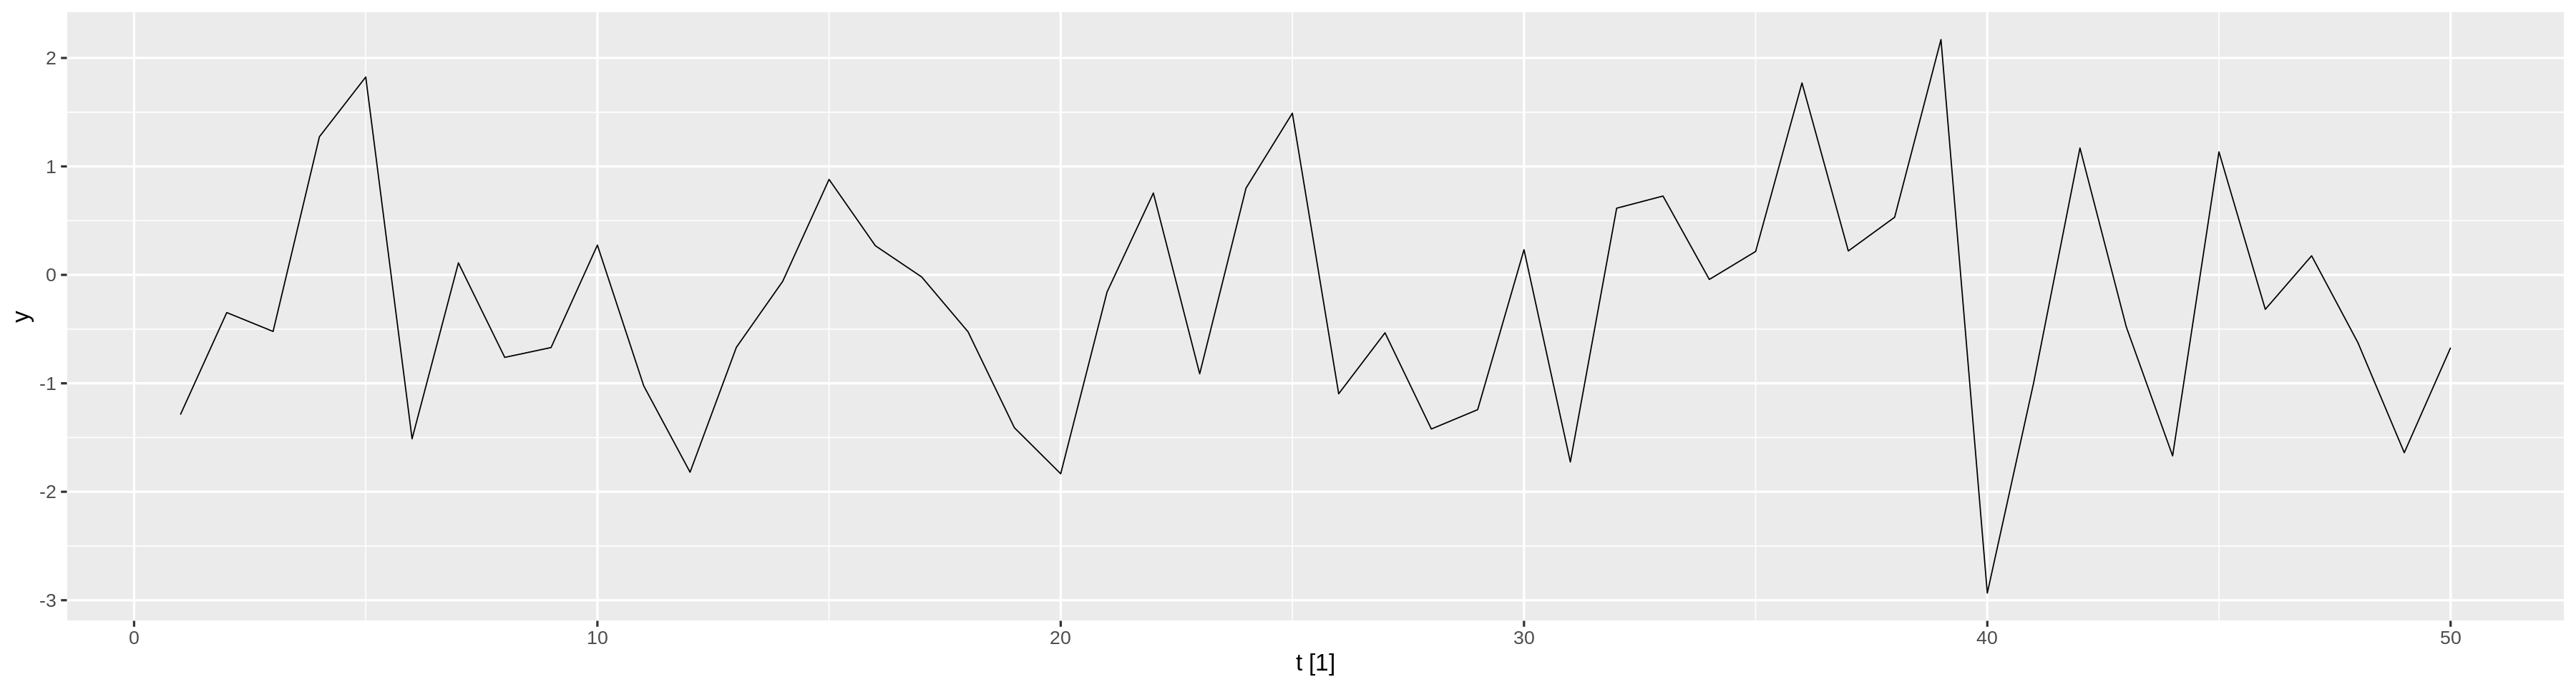

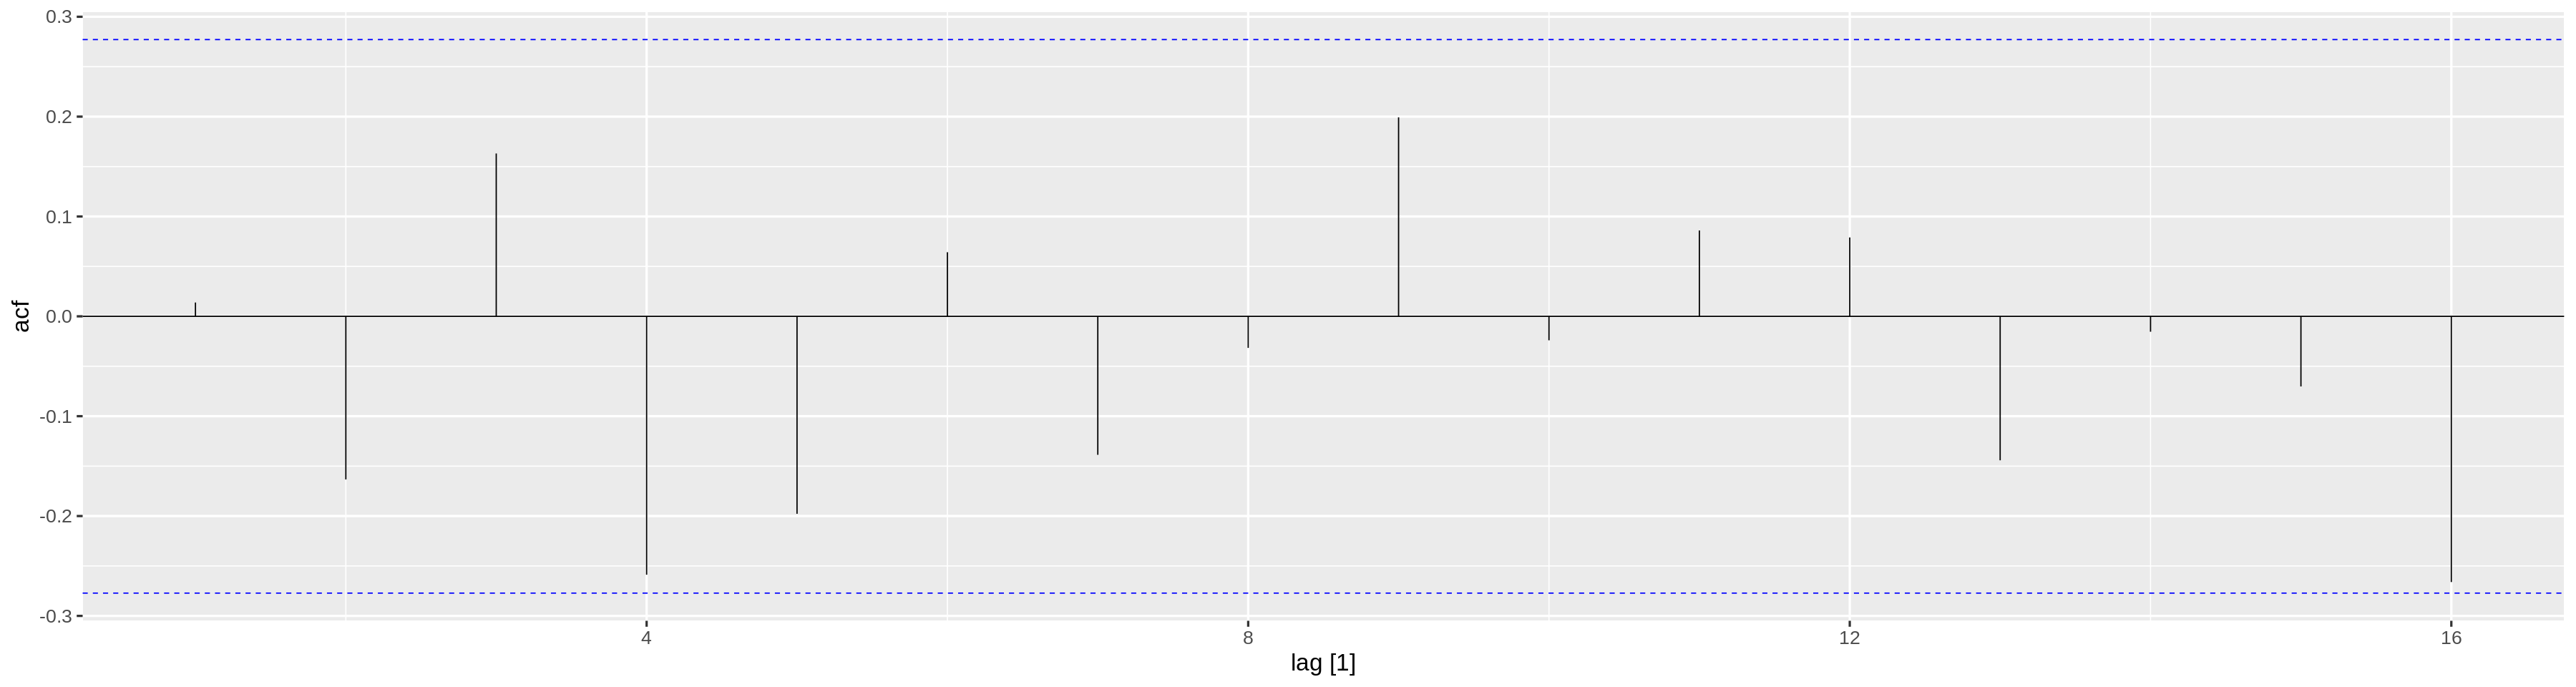

Warning message:
“Removed 12 row(s) containing missing values (geom_path).”


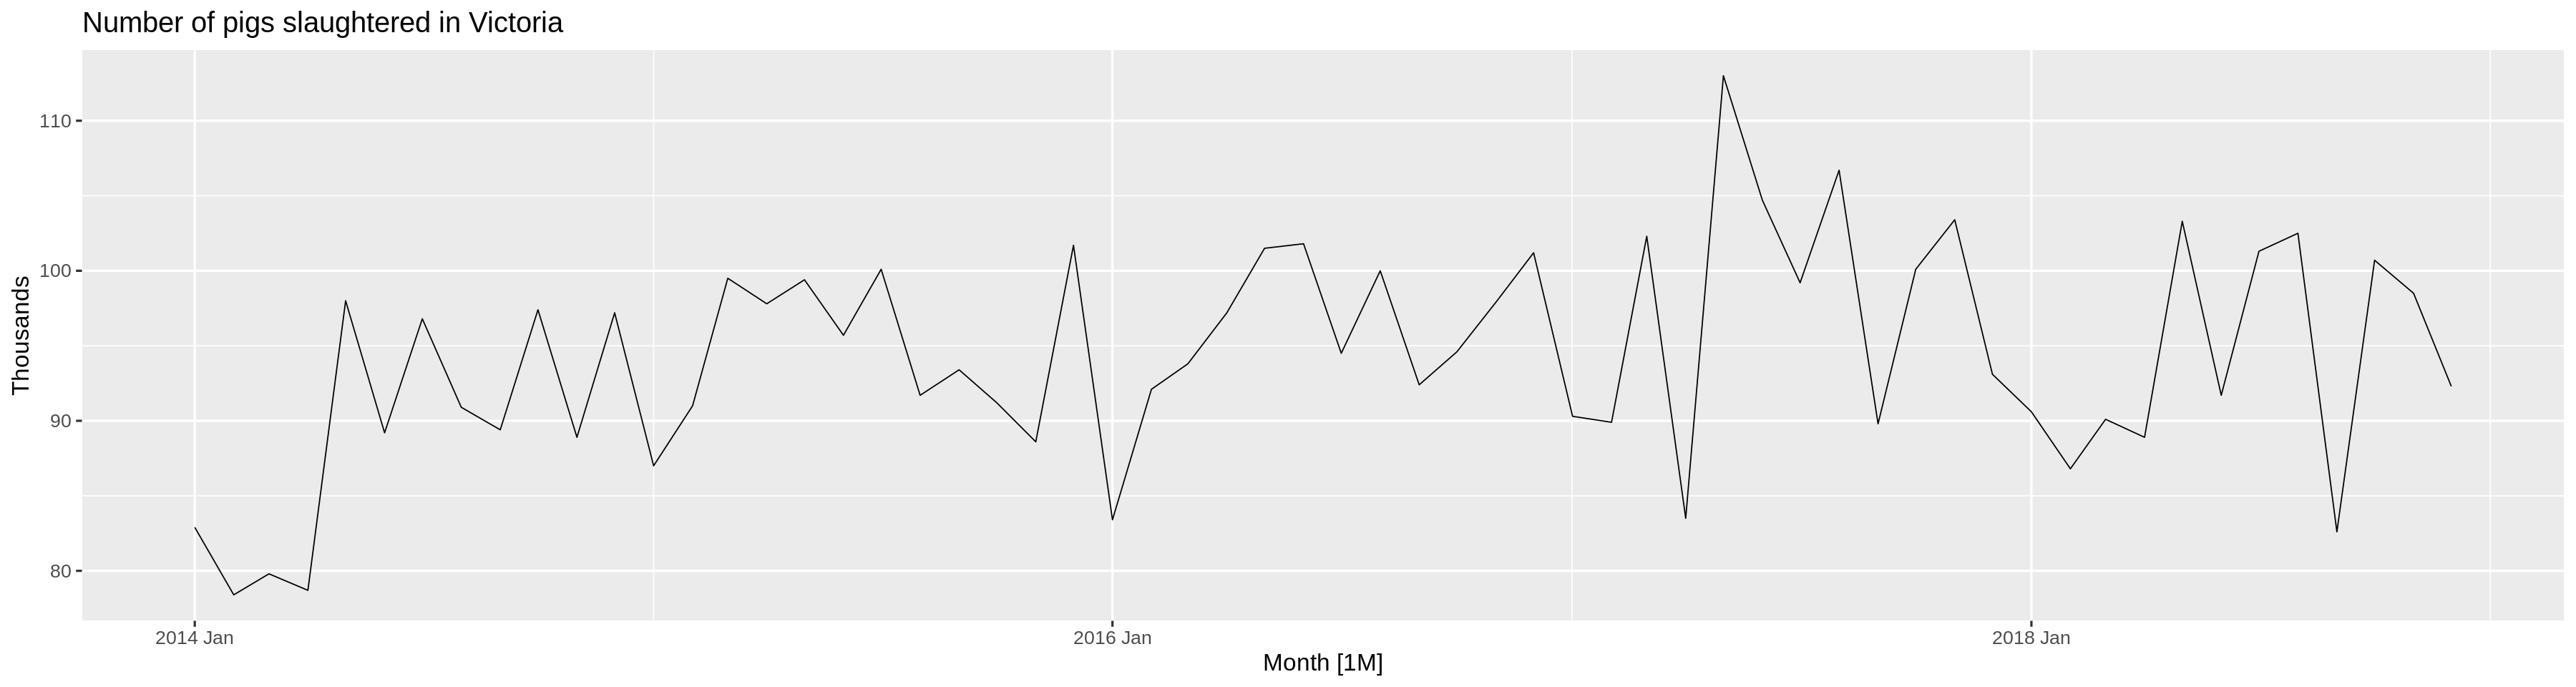

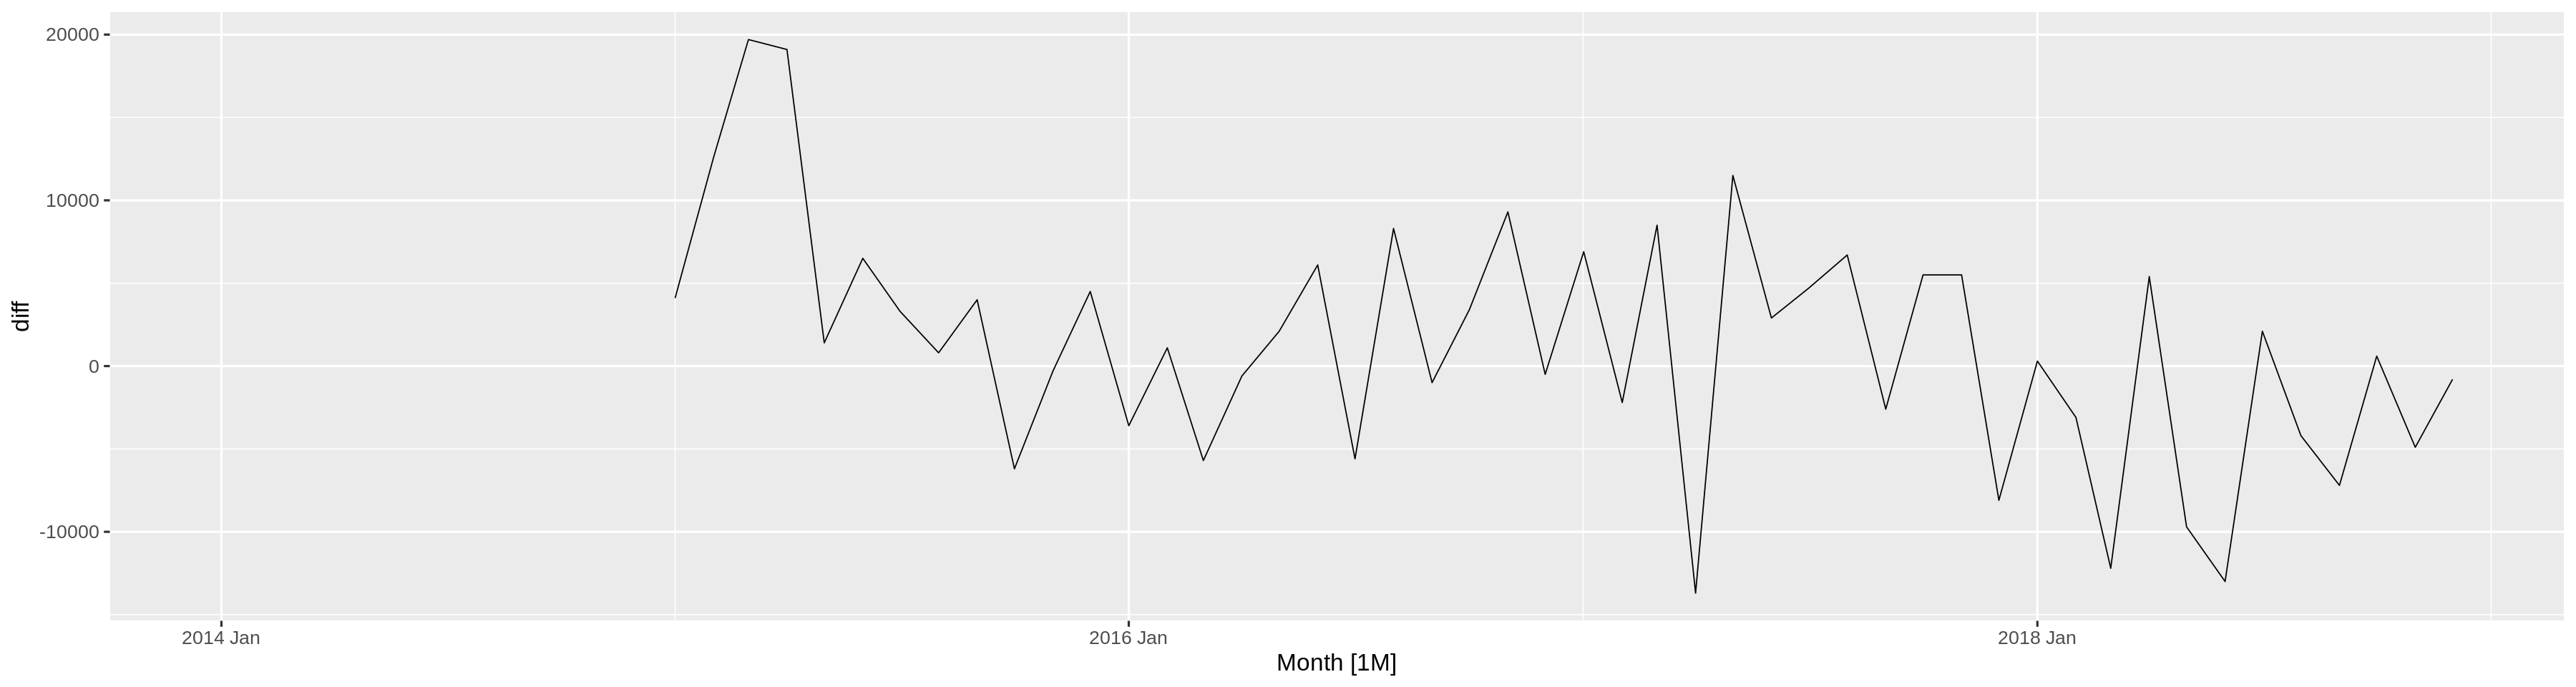

Warning message:
“Provided data has an irregular interval, results should be treated with caution. Computing ACF by observation.”


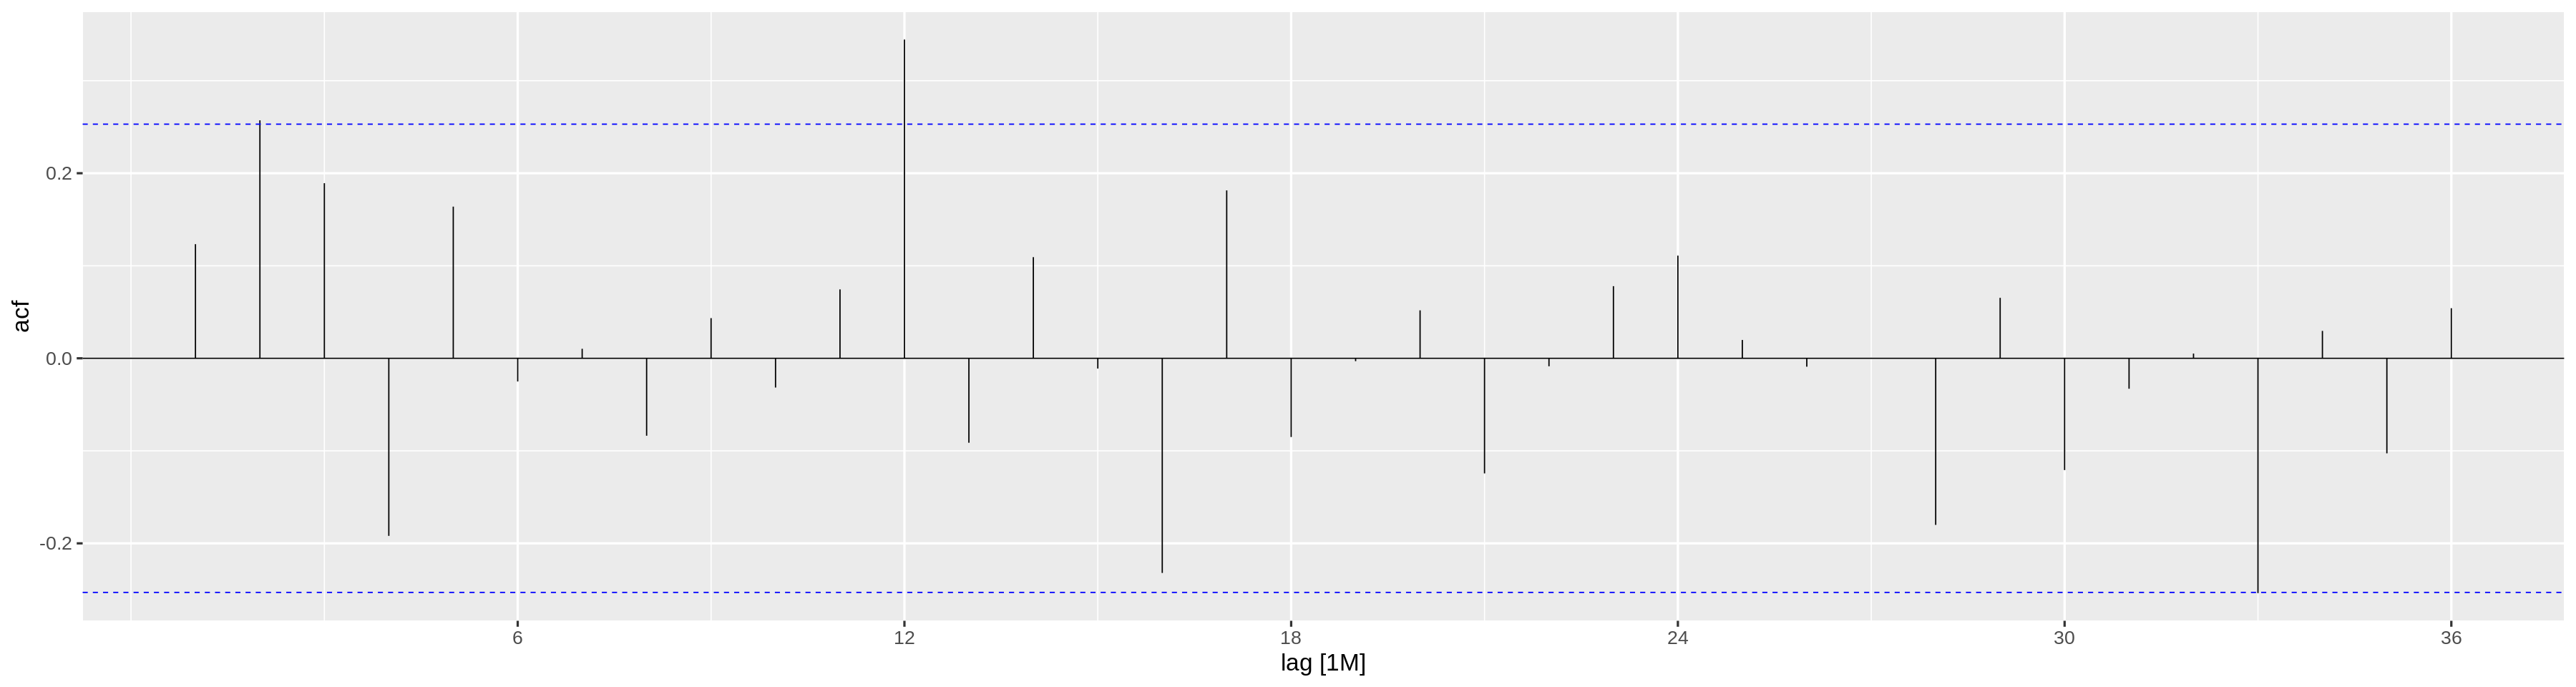

Warning message:
“Removed 1 row(s) containing missing values (geom_path).”


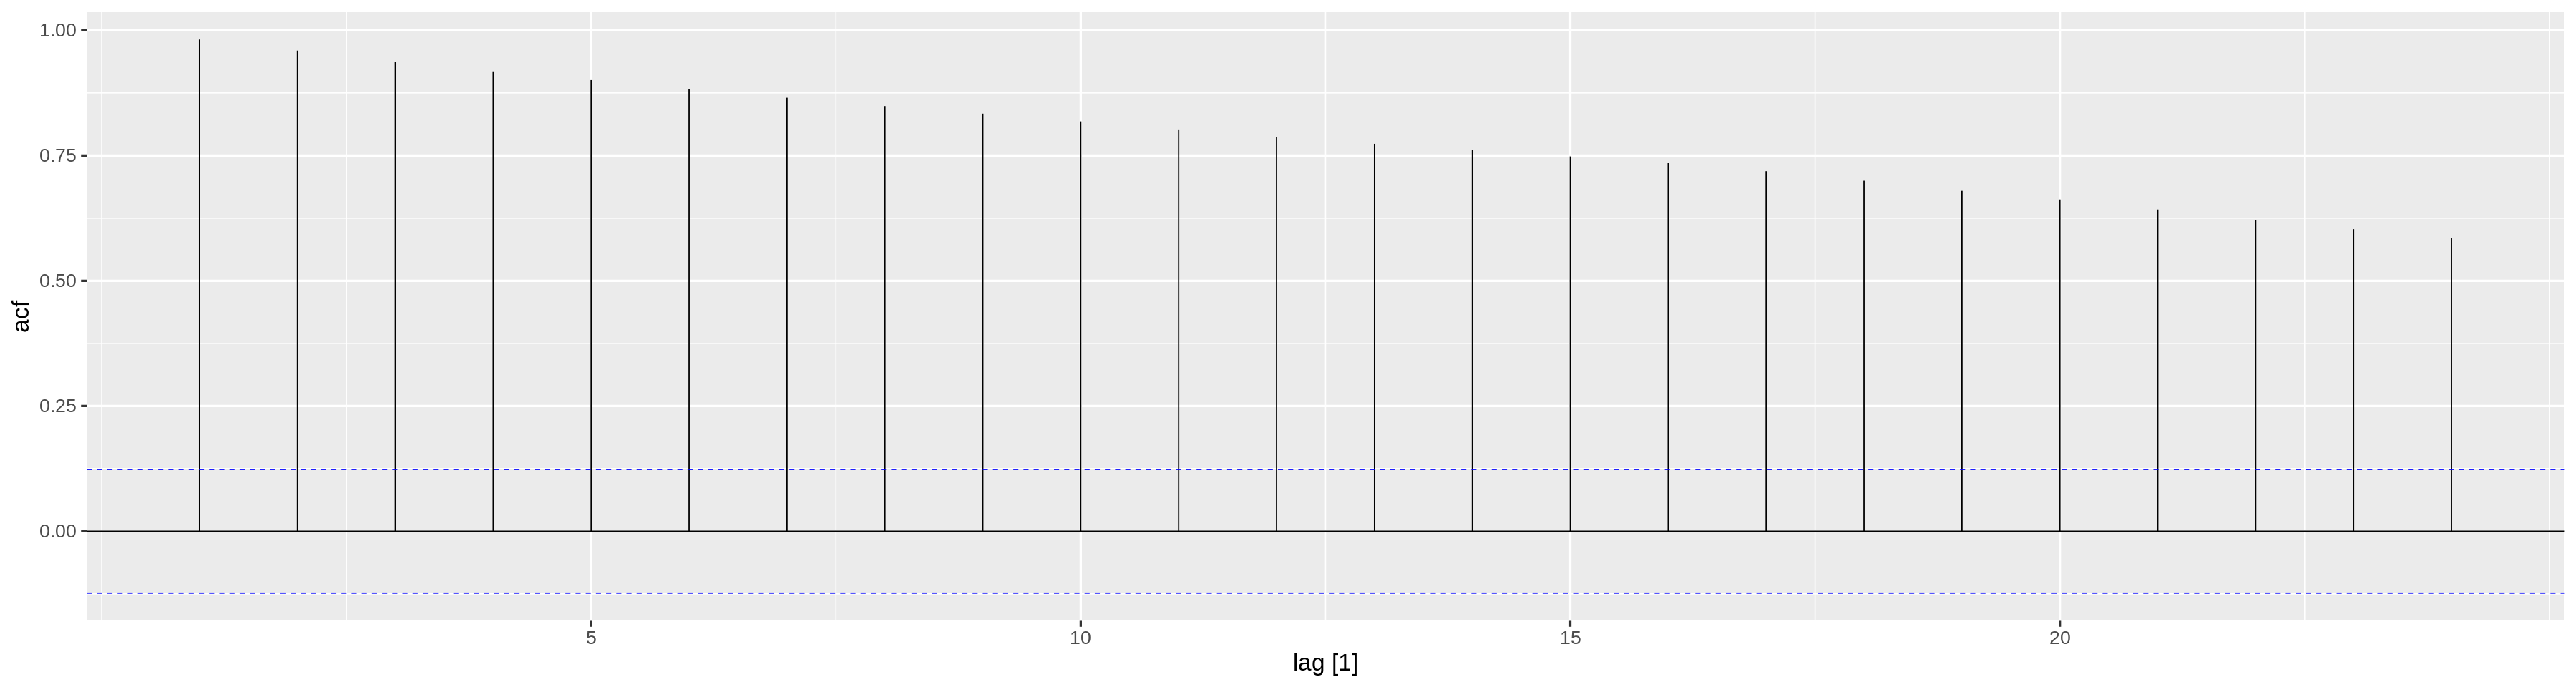

Warning message:
“Provided data has an irregular interval, results should be treated with caution. Computing ACF by observation.”


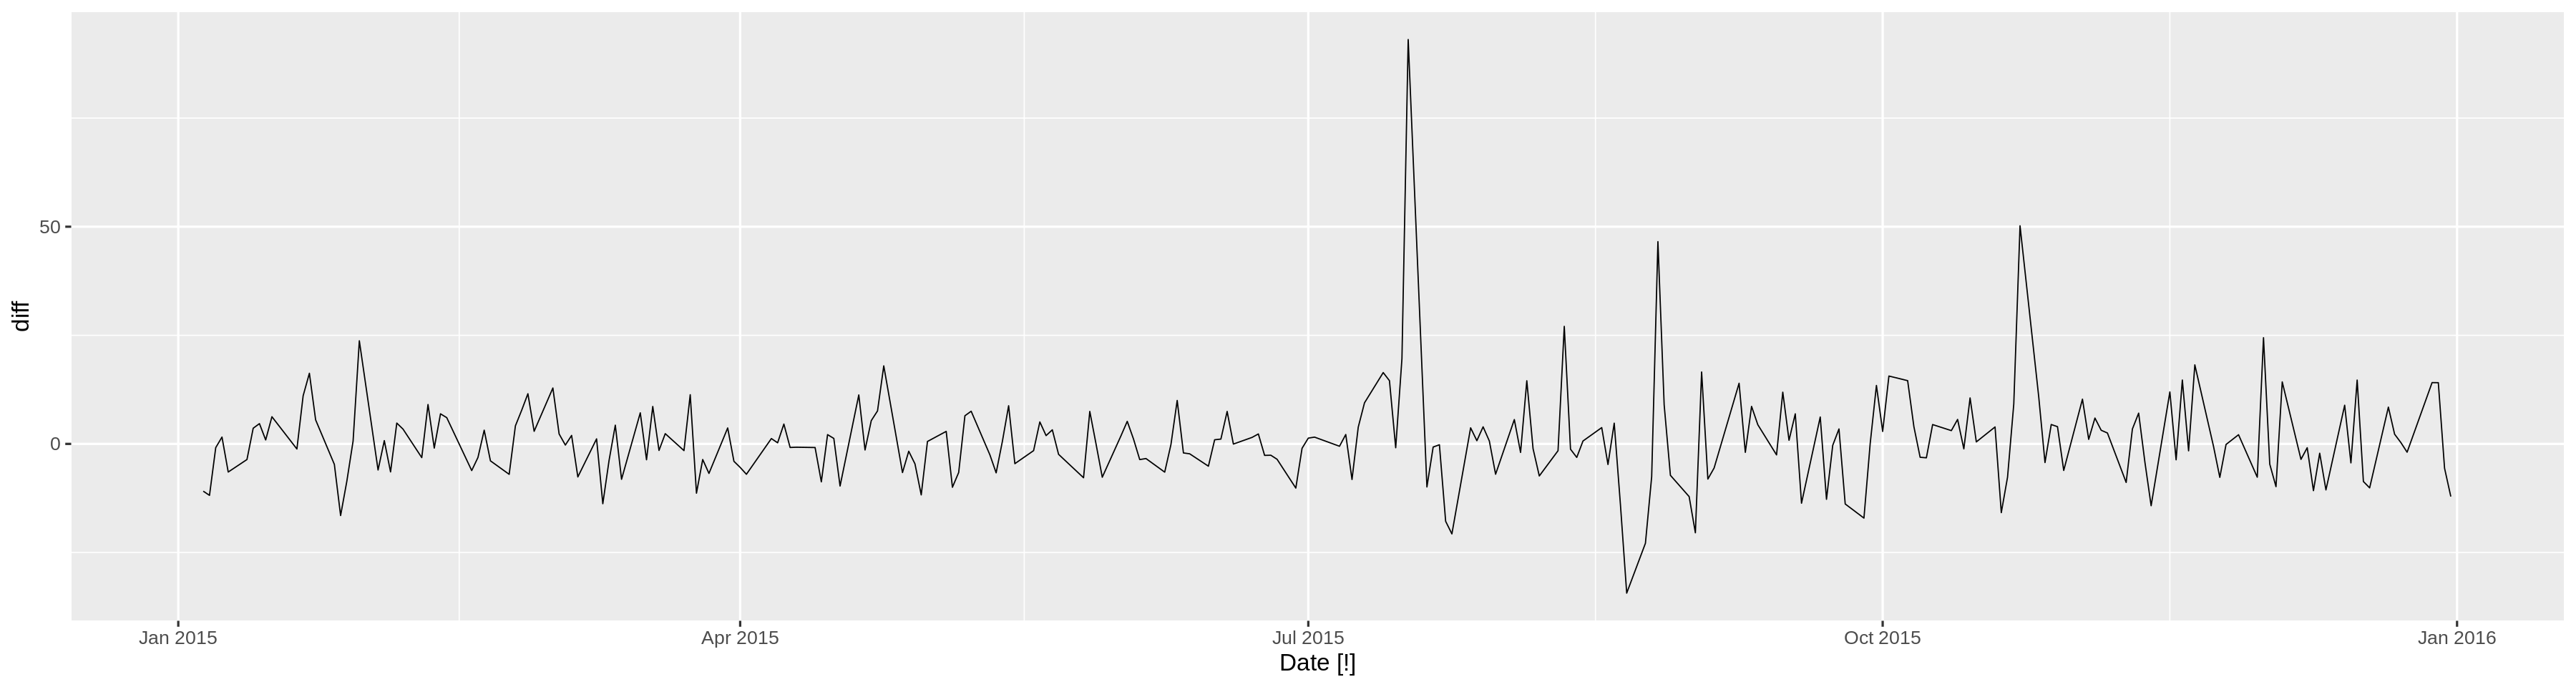

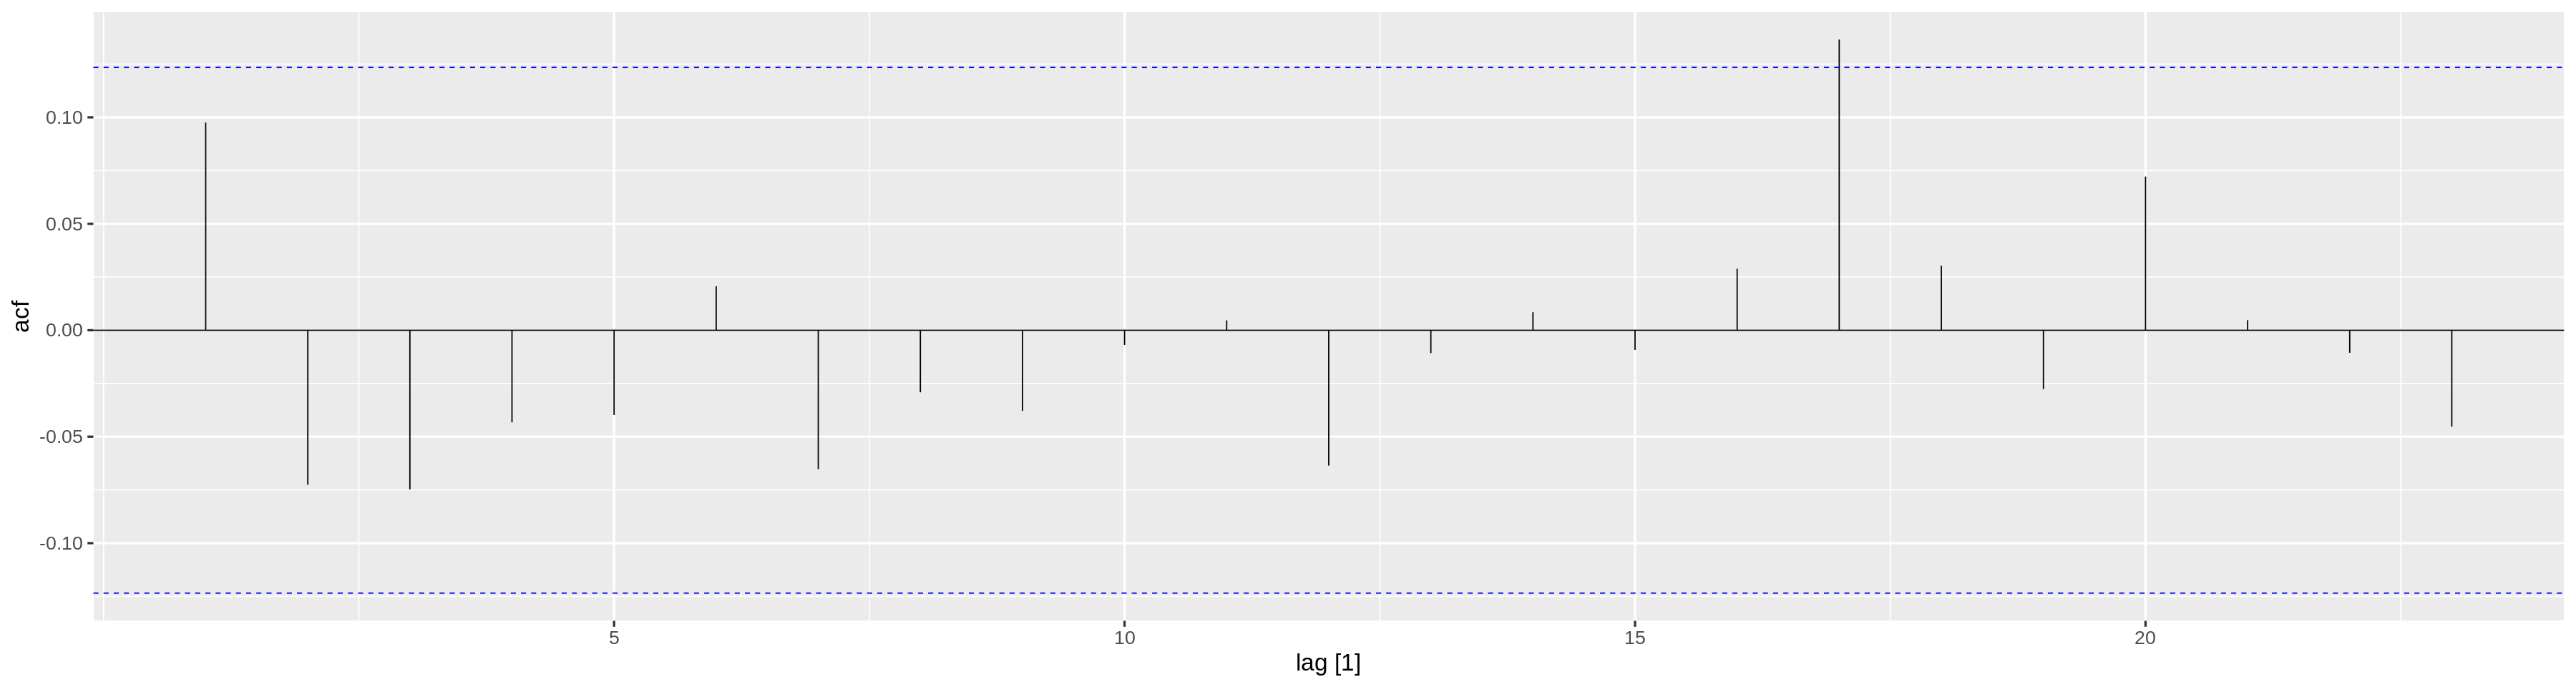

In [13]:




## HOLIDAYS --------------------------------------------------------------------

holidays <- tourism %>%
  mutate(
    State = recode(State,
      "Australian Capital Territory" = "ACT",
      "New South Wales" = "NSW",
      "Northern Territory" = "NT",
      "Queensland" = "QLD",
      "South Australia" = "SA",
      "Tasmania" = "TAS",
      "Victoria" = "VIC",
      "Western Australia" = "WA"
    )
  ) %>%
  filter(Purpose == "Holiday") %>%
  group_by(State) %>%
  summarise(Trips = sum(Trips))

holidays

holidays %>%
  autoplot(Trips) +
  labs(
    y = "thousands of trips",
    title = "Australian domestic holiday nights"
  )

holidays %>%
  gg_season(Trips) +
  labs(
    y = "thousands of trips",
    title = "Australian domestic holiday nights"
  )

holidays %>%
  gg_subseries(Trips) +
  labs(
    y = "thousands of trips",
    title = "Australian domestic holiday nights"
  )

## RETAIL TRADE ------------------------------------------------------------------

retail <- us_employment %>%
  filter(Title == "Retail Trade", year(Month) >= 1980)
retail %>% autoplot(Employed)

retail %>%
  ACF(Employed, lag_max = 48) %>%
  autoplot()

## Google 2015 -------------------------------------------------------------------

google_2015 <- gafa_stock %>%
  filter(Symbol == "GOOG", year(Date) == 2015) %>%
  select(Date, Close)
google_2015

google_2015 %>% autoplot(Close)

google_2015 %>% ACF(Close)

google_2015 %>%
  ACF(Close, lag_max = 100) %>%
  autoplot()

## WHITE NOISE --------------------------------------------------------------------

set.seed(30)
wn <- tsibble(t = seq(50), y = rnorm(50), index = t)
wn %>% autoplot(y)

wn %>% ACF(y, lag_max = 10)

wn %>%
  ACF(y) %>%
  autoplot()

## PIGS ---------------------------------------------------------------------------

pigs <- aus_livestock %>%
  filter(
    State == "Victoria", Animal == "Pigs",
    year(Month) >= 2014
  )
pigs %>% autoplot(Count / 1e3) +
  labs(
    y = "Thousands",
    title = "Number of pigs slaughtered in Victoria"
  )

pigs %>%
  mutate(diff = difference(Count, lag = 12)) %>%
  autoplot(diff)

pigs %>%
  ACF(Count, lag_max = 36) %>%
  autoplot()

## GOOGLE change in closing price ACF ---------------------------------------------

google_2015 %>%
  ACF(Close) %>%
  autoplot()

google_2015 %>%
  mutate(diff = difference(Close)) %>%
  autoplot(diff)

google_2015 %>%
  mutate(diff = difference(Close)) %>%
  ACF(diff) %>%
  autoplot()